## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = data[:,0]
y = data[:,1]

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

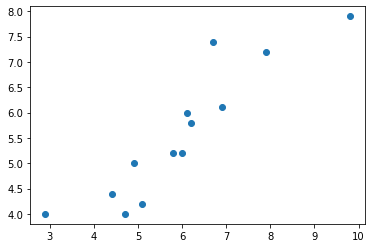

In [7]:
plt.scatter(X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [8]:
theta_0,theta_1 =0,0
alpha = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [9]:
yhat = theta_0 + theta_1 * X
print("h(x):",yhat)

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [10]:
m = len(X)
e = yhat - y
print("Error Vector:\n",e)
J = (e @ e)/(2*m)
print("j = ",J)

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [11]:
d_theta_0 = np.sum(e)/m
d_theta_1 = (e @ X)/m
print("d_theta_0 : ",d_theta_0)
print("d_theta_1 : ",d_theta_1)

d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.04384604321538


### Step5: Update the parameters (simultaneously).

In [12]:
theta_0_new = theta_0 - (alpha * d_theta_0)
theta_1_new = theta_1 - (alpha * d_theta_1)
print("theta_0_new : ",theta_0_new)
print("theta_1_new : ",theta_1_new)

theta_0_new :  0.0005569230739769231
theta_1_new :  0.0035043846043215383


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [13]:
Grad_norm = 100
i = 0
theta_0,theta_1 =0,0
alpha = 0.01
loss = []
while Grad_norm > 0.04 :
    print(f'****************** iteration{i}**************************')
    yhat = theta_0 + theta_1 * X
    print("h(x):",yhat)
    m = len(X)
    e = yhat - y
    print("Error Vector:\n",e)
    J = (e @ e)/(2*m)
    print("j = ",J)
    loss.append(J)
    d_theta_0 = np.sum(e)/m
    d_theta_1 = (e @ X)/m
    print("d_theta_0 : ",d_theta_0)
    print("d_theta_1 : ",d_theta_1)
    theta_0_new = theta_0 - (alpha * d_theta_0)
    theta_1_new = theta_1 - (alpha * d_theta_1)
    print("theta_0_new : ",theta_0_new)
    print("theta_1_new : ",theta_1_new)
    Grad_norm = np.sqrt(((d_theta_0)**2 + (d_theta_1)**2))
    i += 1
    theta_0,theta_1 = theta_0_new,theta_1_new
    

****************** iteration0**************************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692314
d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.04384604321538
theta_0_new :  0.0556923073976923
theta_1_new :  0.3504384604321538
****************** iteration1**************************
h(x): [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector:
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j =  6.175608808043303
d_theta_0 :  -3.427081750033852
d_theta_1 :  -21.338452630007847
theta_0_new :  0.08996312489803082
theta_1_new :  0.5638229867322323
****************** iteration

j =  0.19356512827890196
d_theta_0 :  -0.08324574853638908
d_theta_1 :  0.013010897928393588
theta_0_new :  0.23618559441630105
theta_1_new :  0.8817589610856669
****************** iteration111**************************
h(x): [2.79328667 6.14397047 4.55680459 7.20208147 8.87742358 6.32032251
 5.61491517 5.70309098 5.52673936 4.73315621 4.38045254 4.11592511
 5.35038774]
Error Vector:
 [-1.20671333 -1.25602963 -0.44319541  0.00208166  0.97742349  0.2203226
 -0.38508483 -0.09690921  0.32673955  0.5331564   0.38045254 -0.28407499
  0.15038793]
j =  0.19349416154715668
d_theta_0 :  -0.08318793989785594
d_theta_1 :  0.013001862724695825
theta_0_new :  0.2370174738152796
theta_1_new :  0.8816289424584199
****************** iteration112**************************
h(x): [2.79374149 6.14393122 4.55699938 7.2018862  8.87698128 6.32025726
 5.61495394 5.70311675 5.52679113 4.733325   4.38067333 4.1161849
 5.35046551]
Error Vector:
 [-1.20625851 -1.25606888 -0.44300062  0.00188639  0.97698118  0.220

 5.35761279]
Error Vector:
 [-1.16445952 -1.25967557 -0.42509937 -0.01605895  0.936333    0.21426088
 -0.38148344 -0.09451571  0.33154883  0.54883668  0.40096437 -0.2599395
  0.15761298]
j =  0.18712057911079255
d_theta_0 :  -0.0778211782150926
d_theta_1 :  0.012163064471469198
theta_0_new :  0.3142463897083465
theta_1_new :  0.8695584456526151
****************** iteration208**************************
h(x): [2.83596596 6.14028781 4.57508286 7.18375819 8.83591932 6.31419975
 5.61855283 5.70550859 5.53159706 4.74899438 4.40117092 4.14030363
 5.35768554]
Error Vector:
 [-1.16403404 -1.25971229 -0.42491714 -0.01624162  0.93591923  0.21419984
 -0.38144717 -0.0944916   0.33159725  0.54899457  0.40117092 -0.25969646
  0.15768573]
j =  0.18705855989322295
d_theta_0 :  -0.07776713658004591
d_theta_1 :  0.012154618031741936
theta_0_new :  0.315024061074147
theta_1_new :  0.8694368994722976
****************** iteration209**************************
h(x): [2.83639115 6.14025112 4.57526495 7.1835756

****************** iteration318**************************
h(x): [2.88100991 6.13640112 4.59437383 7.16441971 8.79211552 6.30773775
 5.62239202 5.70806014 5.53672391 4.76571006 4.4230372  4.16603285
 5.36538768]
Error Vector:
 [-1.11899009 -1.26359898 -0.40562617 -0.0355801   0.89211542  0.20773785
 -0.37760798 -0.09194005  0.3367241   0.56571025  0.4230372  -0.23396724
  0.16538787]
j =  0.18073657385103695
d_theta_0 :  -0.07204599322840609
d_theta_1 :  0.011260431679999282
theta_0_new :  0.39735260943040707
theta_1_new :  0.8565693553863915
****************** iteration319**************************
h(x): [2.88140382 6.13636713 4.59454253 7.1642506  8.79173246 6.30768124
 5.6224256  5.70808245 5.53676874 4.76585624 4.42322842 4.16625785
 5.36545503]
Error Vector:
 [-1.11859618 -1.26363297 -0.40545747 -0.03574921  0.89173236  0.20768134
 -0.3775744  -0.09191774  0.33676893  0.56585643  0.42322842 -0.23374224
  0.16545523]
j =  0.1806834180894002
d_theta_0 :  -0.07199596207542222
d_theta_

  0.17258578]
j =  0.17526493658805375
d_theta_0 :  -0.06669939031147737
d_theta_1 :  0.01042478414197288
theta_0_new :  0.47429143611824015
theta_1_new :  0.844544198085676
****************** iteration430**************************
h(x): [2.92346969 6.1327374  4.61255809 7.14619068 8.75082474 6.30164648
 5.62601096 5.7104653  5.54155662 4.78146677 4.44364901 4.19028599
 5.37264795]
Error Vector:
 [-1.07653031 -1.26726269 -0.38744191 -0.05380913  0.85082464  0.20164658
 -0.37398904 -0.08953489  0.34155682  0.58146696  0.44364901 -0.20971411
  0.17264814]
j =  0.1752193775644814
d_theta_0 :  -0.06665307201879979
d_theta_1 :  0.01041754482238297
theta_0_new :  0.47495796683842817
theta_1_new :  0.8444400226374522
****************** iteration431**************************
h(x): [2.92383411 6.13270596 4.61271416 7.14603423 8.75047035 6.3015942
 5.62604202 5.71048595 5.5415981  4.781602   4.44382591 4.19049415
 5.37271026]
Error Vector:
 [-1.07616589 -1.26729414 -0.38728584 -0.05396558  0.850

h(x): [2.96140027 6.1294645  4.62880262 7.12990615 8.71393846 6.29620497
 5.62924387 5.71261391 5.54587383 4.7955427  4.46206215 4.21195203
 5.37913376]
Error Vector:
 [-1.03859973 -1.2705356  -0.37119738 -0.07009366  0.81393836  0.19620507
 -0.37075613 -0.08738628  0.34587403  0.59554289  0.46206215 -0.18804806
  0.17913395]
j =  0.1706535354358899
d_theta_0 :  -0.06183541532532049
d_theta_1 :  0.009664568957607486
theta_0_new :  0.5442851375934344
theta_1_new :  0.8336045294354958
****************** iteration539**************************
h(x): [2.96173835 6.12943533 4.62894741 7.129761   8.71360969 6.29615647
 5.62927269 5.71263306 5.54591231 4.79566816 4.46222627 4.21214515
 5.37919157]
Error Vector:
 [-1.03826165 -1.27056477 -0.37105259 -0.07023881  0.81360959  0.19615656
 -0.37072731 -0.08736713  0.34591251  0.59566835  0.46222627 -0.18785495
  0.17919176]
j =  0.17061437881163258
d_theta_0 :  -0.061792474739934544
d_theta_1 :  0.009657857556925652
theta_0_new :  0.544903062340833

 5.38536508]
Error Vector:
 [-1.00215748 -1.27368008 -0.35559025 -0.08573922  0.77849944  0.19097707
 -0.36765007 -0.08532198  0.35002183  0.6090665   0.47975279 -0.16723216
  0.18536527]
j =  0.16658935169937347
d_theta_0 :  -0.05720679535813488
d_theta_1 :  0.008941138596284759
theta_0_new :  0.6108920270505835
theta_1_new :  0.823194202718618
****************** iteration651**************************
h(x): [2.99815529 6.12629303 4.6445437  7.11412631 8.67819537 6.2909321
 5.63237659 5.71469593 5.55005724 4.80918238 4.47990462 4.2329466
 5.38541856]
Error Vector:
 [-1.00184471 -1.27370707 -0.3554563  -0.0858735   0.77819528  0.1909322
 -0.36762341 -0.08530426  0.35005743  0.60918257  0.47990462 -0.1670535
  0.18541875]
j =  0.16655583772608315
d_theta_0 :  -0.057167069041625086
d_theta_1 :  0.008934929569897977
theta_0_new :  0.6114636977409998
theta_1_new :  0.8231048534229191
****************** iteration652**************************
h(x): [2.99846785 6.12626606 4.64467756 7.11399212

h(x): [3.03126736 6.1234359  4.65872461 7.09991048 8.64599494 6.28618185
 5.6351988  5.71657159 5.55382602 4.82147018 4.49597865 4.25186029
 5.39108045]
Error Vector:
 [-0.96873264 -1.2765642  -0.34127539 -0.10008933  0.74599485  0.18618195
 -0.3648012  -0.08342861  0.35382621  0.62147037  0.49597865 -0.1481398
  0.19108064]
j =  0.16313956000343147
d_theta_0 :  -0.05296142368340093
d_theta_1 :  0.00827760804368527
theta_0_new :  0.6719838867945694
theta_1_new :  0.8136458478132936
****************** iteration762**************************
h(x): [3.03155692 6.12341091 4.65884862 7.09978616 8.64571335 6.28614031
 5.63522348 5.71658799 5.55385897 4.82157763 4.49611922 4.25202569
 5.39112996]
Error Vector:
 [-0.96844308 -1.27658918 -0.34115138 -0.10021365  0.74571326  0.18614041
 -0.36477652 -0.0834122   0.35385916  0.62157782  0.49611922 -0.1479744
  0.19113015]
j =  0.1631108356685313
d_theta_0 :  -0.052924645495304665
d_theta_1 :  0.008271859795159653
theta_0_new :  0.6725131332495224
t

h(x): [3.061675   6.12081212 4.67174729 7.08685573 8.61642448 6.28181958
 5.63779051 5.71829405 5.55728697 4.83275437 4.51073983 4.26922922
 5.3962799 ]
Error Vector:
 [-0.938325   -1.27918797 -0.32825271 -0.11314408  0.71642438  0.18181968
 -0.36220949 -0.08170614  0.35728717  0.63275456  0.51073983 -0.13077088
  0.19628009]
j =  0.16023213528998884
d_theta_0 :  -0.04909927383728769
d_theta_1 :  0.007673973163640584
theta_0_new :  0.727561097645916
theta_1_new :  0.8049594051991621
****************** iteration871**************************
h(x): [3.06194345 6.12078896 4.67186226 7.08674048 8.61616342 6.28178107
 5.63781339 5.71830926 5.55731753 4.83285399 4.51087015 4.26938256
 5.3963258 ]
Error Vector:
 [-0.93805655 -1.27921114 -0.32813774 -0.11325933  0.71616333  0.18178116
 -0.36218661 -0.08169093  0.35731772  0.63285418  0.51087015 -0.13061754
  0.19632599]
j =  0.16020744757939864
d_theta_0 :  -0.049065177655520036
d_theta_1 :  0.007668644099412907
theta_0_new :  0.728051749422471

h(x): [3.09011407 6.11835821 4.6839269  7.07464613 8.58876839 6.27773972
 5.64021444 5.719905   5.56052387 4.84330803 4.52454539 4.28547369
 5.40114274]
Error Vector:
 [-0.90988593 -1.28164189 -0.3160731  -0.12535368  0.68876829  0.17773981
 -0.35978556 -0.08009519  0.36052406  0.64330822  0.52454539 -0.1145264
  0.20114293]
j =  0.15771207196409032
d_theta_0 :  -0.04548715699156309
d_theta_1 :  0.00710941720238889
theta_0_new :  0.7795402770028638
theta_1_new :  0.7968353170756783
****************** iteration981**************************
h(x): [3.09036277 6.11833675 4.68403341 7.07453936 8.58852654 6.27770404
 5.64023564 5.71991909 5.56055218 4.84340032 4.52466612 4.28561575
 5.40118527]
Error Vector:
 [-0.90963723 -1.28166335 -0.31596659 -0.12546045  0.68852644  0.17770414
 -0.35976436 -0.0800811   0.36055237  0.64340051  0.52466612 -0.11438435
  0.20118546]
j =  0.15769088307114315
d_theta_0 :  -0.045455569184826614
d_theta_1 :  0.007104480184745982
theta_0_new :  0.779994832694712


 5.40525236]
Error Vector:
 [-0.8858519  -1.2837157  -0.30578005 -0.13567208  0.66539597  0.1742919
 -0.35773709 -0.07873376  0.36325959  0.65222718  0.53621254 -0.1007981
  0.20525255]
j =  0.15573241552970382
d_theta_0 :  -0.04243453547860858
d_theta_1 :  0.006632307588772048
theta_0_new :  0.8234681918261583
theta_1_new :  0.7899696016965525
****************** iteration1081**************************
h(x): [3.11438011 6.11626437 4.69431932 7.06422812 8.56517044 6.27425852
 5.64228269 5.72127957 5.5632858  4.85231309 4.53632517 4.29933451
 5.40529203]
Error Vector:
 [-0.88561989 -1.28373572 -0.30568068 -0.13577169  0.66517034  0.17425861
 -0.35771731 -0.07872062  0.36328599  0.65231328  0.53632517 -0.10066558
  0.20529222]
j =  0.1557139751616803
d_theta_0 :  -0.042405067514587245
d_theta_1 :  0.006627701892041384
theta_0_new :  0.8238922425013041
theta_1_new :  0.7899033246776321
****************** iteration1082**************************
h(x): [3.11461196 6.11624437 4.69441861 7.0641

 5.40871468]
Error Vector:
 [-0.86560345 -1.28546287 -0.29710824 -0.14436524  0.645705    0.17138706
 -0.35601127 -0.07758677  0.36556424  0.65974132  0.54604201 -0.08923214
  0.20871487]
j =  0.15417126694550704
d_theta_0 :  -0.0398627306622557
d_theta_1 :  0.006230347241905443
theta_0_new :  0.8604770455066405
theta_1_new :  0.7841853012830223
****************** iteration1171**************************
h(x): [3.13461449 6.11451841 4.7029851  7.055541   8.54549315 6.2713557
 5.64400731 5.72242576 5.56558885 4.85982201 4.54614781 4.31089245
 5.40875194]
Error Vector:
 [-0.86538551 -1.28548168 -0.2970149  -0.14445881  0.64549305  0.17135579
 -0.35599269 -0.07757443  0.36558904  0.6598222   0.54614781 -0.08910765
  0.20875213]
j =  0.1541549940524648
d_theta_0 :  -0.0398350486457176
d_theta_1 :  0.006226020679908773
theta_0_new :  0.8608753959930977
theta_1_new :  0.7841230410762232
****************** iteration1172**************************
h(x): [3.13483229 6.11449962 4.70307837 7.055447

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
y_predict = theta_0 + theta_1*X
print("y_predict: \n",y_predict)
print("y_actual: \n",y)

y_predict: 
 [3.13743407 6.11427512 4.70419264 7.05433049 8.5427512  6.2709512
 5.64424763 5.72258548 5.56590977 4.86086835 4.54751656 4.312503
 5.40923407]
y_actual: 
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

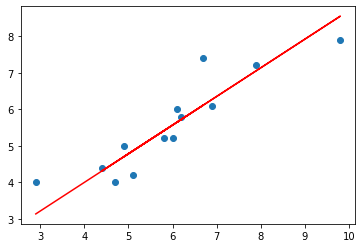

In [15]:
plt.scatter(X,y)
plt.plot(X,yhat,'r')
plt.show()

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [16]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.8068968525306497

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [17]:
Loss = np.array(loss)

### Plot loss vs. iterations

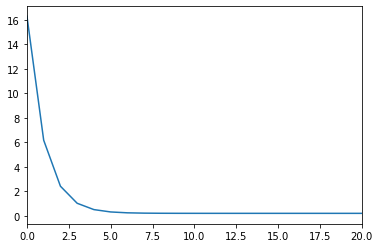

In [18]:

plt.plot(Loss)
plt.xlim((0,20))
plt.show()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [19]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [20]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [21]:
X1 = data2[:,0]
X1

array([73., 93., 89., 96., 73., 53., 69., 47., 87., 79., 69., 70., 93.,
       79., 70., 93., 78., 81., 88., 78., 82., 86., 78., 76., 96.])

In [22]:
X2 = data2[:,1]
X2

array([80., 88., 91., 98., 66., 46., 74., 56., 79., 70., 70., 65., 95.,
       80., 73., 89., 75., 90., 92., 83., 86., 82., 83., 83., 93.])

In [23]:
X3 = data2[:,2]
X3

array([ 75.,  93.,  90., 100.,  70.,  55.,  77.,  60.,  90.,  88.,  73.,
        74.,  91.,  73.,  78.,  96.,  68.,  93.,  86.,  77.,  90.,  89.,
        85.,  71.,  95.])

In [24]:
M = data2.shape[0]
print(M)
X = np.ones((M,4))
X[:,1:] = data2[:,1:]
X

25


array([[  1.,  80.,  75., 152.],
       [  1.,  88.,  93., 185.],
       [  1.,  91.,  90., 180.],
       [  1.,  98., 100., 196.],
       [  1.,  66.,  70., 142.],
       [  1.,  46.,  55., 101.],
       [  1.,  74.,  77., 149.],
       [  1.,  56.,  60., 115.],
       [  1.,  79.,  90., 175.],
       [  1.,  70.,  88., 164.],
       [  1.,  70.,  73., 141.],
       [  1.,  65.,  74., 141.],
       [  1.,  95.,  91., 184.],
       [  1.,  80.,  73., 152.],
       [  1.,  73.,  78., 148.],
       [  1.,  89.,  96., 192.],
       [  1.,  75.,  68., 147.],
       [  1.,  90.,  93., 183.],
       [  1.,  92.,  86., 177.],
       [  1.,  83.,  77., 159.],
       [  1.,  86.,  90., 177.],
       [  1.,  82.,  89., 175.],
       [  1.,  83.,  85., 175.],
       [  1.,  83.,  71., 149.],
       [  1.,  93.,  95., 192.]])

In [25]:
y2 = data2[:,3]
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [26]:
y2 = y2.reshape(25,1)
y2.shape

(25, 1)

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [45]:
#Grad_norm = 100
#i = 0
theta = np.zeros((4,1))
alpha = 0.000001
loss = []
theta.shape
X.shape

(25, 4)

In [46]:
for i in range(5000):
    print(f'****************** iteration{i}**************************')
    yhat = X @ theta
    print("h(x):",yhat)
    
    e = yhat - y2

    print("Error Vector:\n",e)
    J = (e.T @ e)/(2*M)
    print("j = ",J)
    loss.append(J[0])
    d_theta = X.T @ e
    d_t = d_theta / M
    print("Gradient : ",d_t)
   
    theta = theta - (alpha * d_t)
    
    print("theta : ",theta)
    
    Grad_norm = np.linalg.norm(d_t)
    print("Grad_norm = ",Grad_norm)
    #i += 1
    

****************** iteration0**************************
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
j =  [[13405.98]]
Gradient :  [[  -162.04]
 [-13147.2 ]
 [-13467.08]
 [-26811.96]]
theta :  [[0.00016204]
 [0.0131472 ]
 [0.01346708]
 [0.02681196]]
Grad_norm =  32758.488481149434
****************** iteration1**************************
h(x): [[6.13738696]
 [7.36976668]
 [7.23474724]
 [7.8904398 ]
 [5.61787116]
 [4.0536306 ]
 [6.00500204]
 [4.62780544]
 [6.94292104]
 [6.50273052]
 [5.68404924]
 [5.63178032]
 [7.40805096]
 [6.1104528 ]
 [5.97850996]
 [7.61099884]
 [5.8433216 ]
 [7.34243716]
 [7.11359024]
 [6.39144644]
 [7.08857536]
 [6.96889

h(x): [[150.29648688]
 [180.47816738]
 [177.17034533]
 [193.22784139]
 [137.5763167 ]
 [ 99.27003738]
 [147.05579854]
 [113.33008852]
 [170.02627905]
 [159.24754655]
 [139.19603584]
 [137.91728776]
 [181.41381916]
 [149.6367977 ]
 [146.40723583]
 [186.38624112]
 [143.09553819]
 [179.8082269 ]
 [174.20261917]
 [156.51815309]
 [173.59168634]
 [170.66159006]
 [169.66393023]
 [147.97219779]
 [187.34327066]]
Error Vector:
 [[-1.70351312]
 [-4.52183262]
 [-2.82965467]
 [-2.77215861]
 [-4.4236833 ]
 [-1.72996262]
 [-1.94420146]
 [-1.66991148]
 [-4.97372095]
 [-4.75245345]
 [-1.80396416]
 [-3.08271224]
 [-2.58618084]
 [-2.3632023 ]
 [-1.59276417]
 [-5.61375888]
 [-3.90446181]
 [-3.1917731 ]
 [-2.79738083]
 [-2.48184691]
 [-3.40831366]
 [-4.33840994]
 [-5.33606977]
 [-1.02780221]
 [-4.65672934]]
j =  [[5.91294105]]
Gradient :  [[  -3.1802585 ]
 [-257.15109112]
 [-267.4946956 ]
 [-532.46276953]]
theta :  [[0.00396917]
 [0.32197568]
 [0.33011209]
 [0.65722124]]
Grad_norm =  649.0044767326236
****

 [-1.01414836]]
j =  [[0.65796626]]
Gradient :  [[ -0.09168415]
 [ -6.54660068]
 [-10.86377812]
 [-21.53270858]]
theta :  [[0.0040408 ]
 [0.32771599]
 [0.33632337]
 [0.66957958]]
Grad_norm =  24.9909103555825
****************** iteration177**************************
h(x): [[153.2216685 ]
 [183.99334318]
 [180.61962313]
 [196.990142  ]
 [140.25623206]
 [101.20429904]
 [149.91928059]
 [115.53718986]
 [173.33913341]
 [162.35166742]
 [141.90648653]
 [140.60422998]
 [184.94512875]
 [152.54902176]
 [149.2583084 ]
 [190.01708633]
 [145.88092708]
 [183.30961599]
 [177.59330689]
 [159.56452026]
 [176.97230446]
 [173.98595799]
 [172.96838049]
 [150.85078424]
 [190.9916269 ]]
Error Vector:
 [[ 1.2216685 ]
 [-1.00665682]
 [ 0.61962313]
 [ 0.990142  ]
 [-1.74376794]
 [ 0.20429904]
 [ 0.91928059]
 [ 0.53718986]
 [-1.66086659]
 [-1.64833258]
 [ 0.90648653]
 [-0.39577002]
 [ 0.94512875]
 [ 0.54902176]
 [ 1.2583084 ]
 [-1.98291367]
 [-1.11907292]
 [ 0.30961599]
 [ 0.59330689]
 [ 0.56452026]
 [-0.027695

j =  [[0.64923107]]
Gradient :  [[ 0.0263174 ]
 [ 3.02217707]
 [-1.05631026]
 [-2.01196848]]
theta :  [[0.00404112]
 [0.32766901]
 [0.33661602]
 [0.67015454]]
Grad_norm =  3.7812769489265476
****************** iteration259**************************
h(x): [[153.32725376]
 [184.12279404]
 [180.74518032]
 [197.12749625]
 [140.35526207]
 [101.27630536]
 [150.02400809]
 [115.61823916]
 [173.46237946]
 [162.46842635]
 [142.00563164]
 [140.70390259]
 [185.07309056]
 [152.65402172]
 [149.36280056]
 [190.15139289]
 [145.98182386]
 [183.43782299]
 [177.71592164]
 [159.67457462]
 [177.09637163]
 [174.10877048]
 [173.08997542]
 [150.9533331 ]
 [191.12545293]]
Error Vector:
 [[ 1.32725376]
 [-0.87720596]
 [ 0.74518032]
 [ 1.12749625]
 [-1.64473793]
 [ 0.27630536]
 [ 1.02400809]
 [ 0.61823916]
 [-1.53762054]
 [-1.53157365]
 [ 1.00563164]
 [-0.29609741]
 [ 1.07309056]
 [ 0.65402172]
 [ 1.36280056]
 [-1.84860711]
 [-1.01817614]
 [ 0.43782299]
 [ 0.71592164]
 [ 0.67457462]
 [ 0.09637163]
 [-0.89122952]

h(x): [[153.32948728]
 [184.12800648]
 [180.74885159]
 [197.13189668]
 [140.35956946]
 [101.27993524]
 [150.02754148]
 [115.62128523]
 [173.46851768]
 [162.47543518]
 [142.00899044]
 [140.70859744]
 [185.07627711]
 [152.65612993]
 [149.36653345]
 [190.15736347]
 [145.98430301]
 [183.4422904 ]
 [177.7187341 ]
 [159.67699426]
 [177.10096278]
 [174.11408202]
 [173.09478166]
 [150.95419846]
 [191.13034213]]
Error Vector:
 [[ 1.32948728]
 [-0.87199352]
 [ 0.74885159]
 [ 1.13189668]
 [-1.64043054]
 [ 0.27993524]
 [ 1.02754148]
 [ 0.62128523]
 [-1.53148232]
 [-1.52456482]
 [ 1.00899044]
 [-0.29140256]
 [ 1.07627711]
 [ 0.65612993]
 [ 1.36653345]
 [-1.84263653]
 [-1.01569699]
 [ 0.4422904 ]
 [ 0.7187341 ]
 [ 0.67699426]
 [ 0.10096278]
 [-0.88591798]
 [-1.90521834]
 [ 1.95419846]
 [-0.86965787]]
j =  [[0.64815329]]
Gradient :  [[ 0.03044428]
 [ 3.35126876]
 [-0.71074168]
 [-1.32904167]]
theta :  [[0.0040388 ]
 [0.32741098]
 [0.33667938]
 [0.6702737 ]]
Grad_norm =  3.6747019827406944
***********

j =  [[0.64698063]]
Gradient :  [[ 0.03061525]
 [ 3.3588036 ]
 [-0.69360175]
 [-1.30049673]]
theta :  [[0.00403614]
 [0.3271188 ]
 [0.33674017]
 [0.67038748]]
Grad_norm =  3.6680886073235532
****************** iteration425**************************
h(x): [[153.32795065]
 [184.1290111 ]
 [180.74820958]
 [197.13164264]
 [140.36071173]
 [101.28134627]
 [150.02755572]
 [115.62165993]
 [173.47084652]
 [162.47903463]
 [142.00901996]
 [140.71016611]
 [185.0749749 ]
 [152.65447032]
 [149.3667896 ]
 [190.1590628 ]
 [145.98323804]
 [183.44247373]
 [177.71720526]
 [159.67549979]
 [177.10145311]
 [174.11546276]
 [173.09562089]
 [150.95118394]
 [191.13079784]]
Error Vector:
 [[ 1.32795065]
 [-0.8709889 ]
 [ 0.74820958]
 [ 1.13164264]
 [-1.63928827]
 [ 0.28134627]
 [ 1.02755572]
 [ 0.62165993]
 [-1.52915348]
 [-1.52096537]
 [ 1.00901996]
 [-0.28983389]
 [ 1.0749749 ]
 [ 0.65447032]
 [ 1.3667896 ]
 [-1.8409372 ]
 [-1.01676196]
 [ 0.44247373]
 [ 0.71720526]
 [ 0.67549979]
 [ 0.10145311]
 [-0.88453724]

 [191.13104862]]
Error Vector:
 [[ 1.32636082]
 [-0.87021502]
 [ 0.7474363 ]
 [ 1.131219  ]
 [-1.63834364]
 [ 0.28257947]
 [ 1.02742858]
 [ 0.62190432]
 [-1.52712316]
 [-1.51772905]
 [ 1.00891469]
 [-0.2884889 ]
 [ 1.07357614]
 [ 0.65276567]
 [ 1.36689059]
 [-1.83951474]
 [-1.01790004]
 [ 0.44247479]
 [ 0.71560024]
 [ 0.67394399]
 [ 0.10174914]
 [-0.88340003]
 [-1.9037501 ]
 [ 1.94820522]
 [-0.86895138]]
j =  [[0.64585233]]
Gradient :  [[ 0.03062532]
 [ 3.35351357]
 [-0.68993811]
 [-1.29857778]]
theta :  [[0.00403357]
 [0.32683688]
 [0.33679827]
 [0.67049663]]
Grad_norm =  3.6618724756437913
****************** iteration509**************************
h(x): [[153.32634164]
 [184.12979425]
 [180.74742694]
 [197.13121384]
 [140.36166769]
 [101.28259428]
 [150.027427  ]
 [115.62190723]
 [173.47290123]
 [162.48230985]
 [142.00891338]
 [140.71152725]
 [185.07355925]
 [152.65274511]
 [149.36689176]
 [190.16050233]
 [145.98208623]
 [183.44247475]
 [177.71558087]
 [159.67392522]
 [177.10175265]
 

theta :  [[0.004031  ]
 [0.32655543]
 [0.33685608]
 [0.67060566]]
Grad_norm =  3.6556700299952056
****************** iteration593**************************
h(x): [[153.32473144]
 [184.13057109]
 [180.74664082]
 [197.13078017]
 [140.36261848]
 [101.2838367 ]
 [150.02729407]
 [115.6221506 ]
 [173.47494742]
 [162.48557417]
 [142.00880277]
 [140.71288172]
 [185.07214124]
 [152.65101928]
 [149.36698907]
 [190.16193438]
 [145.98093344]
 [183.44247062]
 [177.71395494]
 [159.6723495 ]
 [177.10204672]
 [174.11775761]
 [173.09688871]
 [150.94515641]
 [191.1313    ]]
Error Vector:
 [[ 1.32473144]
 [-0.86942891]
 [ 0.74664082]
 [ 1.13078017]
 [-1.63738152]
 [ 0.2838367 ]
 [ 1.02729407]
 [ 0.6221506 ]
 [-1.52505258]
 [-1.51442583]
 [ 1.00880277]
 [-0.28711828]
 [ 1.07214124]
 [ 0.65101928]
 [ 1.36698907]
 [-1.83806562]
 [-1.01906656]
 [ 0.44247062]
 [ 0.71395494]
 [ 0.6723495 ]
 [ 0.10204672]
 [-0.88224239]
 [-1.90311129]
 [ 1.94515641]
 [-0.8687    ]]
j =  [[0.64471448]]
Gradient :  [[ 0.03063086]

 [191.13153922]]
Error Vector:
 [[ 1.32318142]
 [-0.86868122]
 [ 0.74588395]
 [ 1.13036226]
 [-1.6364661 ]
 [ 0.28503195]
 [ 1.02716562]
 [ 0.62238441]
 [-1.52308324]
 [-1.51128439]
 [ 1.0086958 ]
 [-0.28581499]
 [ 1.07077623]
 [ 0.64935828]
 [ 1.36708201]
 [-1.83668709]
 [-1.02017547]
 [ 0.44246631]
 [ 0.71239001]
 [ 0.67083292]
 [ 0.10232947]
 [-0.88114139]
 [-1.90250321]
 [ 1.94225643]
 [-0.86846078]]
j =  [[0.6436338]]
Gradient :  [[ 0.03063597]
 [ 3.34234849]
 [-0.68347938]
 [-1.29630658]]
theta :  [[0.00402849]
 [0.32628113]
 [0.33691226]
 [0.670712  ]]
Grad_norm =  3.649628310746312
****************** iteration675**************************
h(x): [[153.3231623 ]
 [184.131328  ]
 [180.74587461]
 [197.13035711]
 [140.36354519]
 [101.28504669]
 [150.02716403]
 [115.62238729]
 [173.47694105]
 [162.48875436]
 [142.00869448]
 [140.71420109]
 [185.07075939]
 [152.64933779]
 [149.36708316]
 [190.16332991]
 [145.97981085]
 [183.44246626]
 [177.71237071]
 [159.67081421]
 [177.10233296]
 [1

j =  [[0.64246372]]
Gradient :  [[ 0.03064149]
 [ 3.33644024]
 [-0.68007326]
 [-1.2951194 ]]
theta :  [[0.00402579]
 [0.32598727]
 [0.33697225]
 [0.67082602]]
Grad_norm =  3.6431588279884113
****************** iteration763**************************
h(x): [[153.32148147]
 [184.13213889]
 [180.74505382]
 [197.12990357]
 [140.36453826]
 [101.28634221]
 [150.0270243 ]
 [115.62264045]
 [173.47907651]
 [162.49216036]
 [142.00857805]
 [140.71561397]
 [185.06927923]
 [152.64753697]
 [149.36718326]
 [190.16482508]
 [145.97860927]
 [183.44246138]
 [177.71067401]
 [159.66916993]
 [177.10263942]
 [174.12006606]
 [173.09816432]
 [150.93907619]
 [191.13180189]]
Error Vector:
 [[ 1.32148147]
 [-0.86786111]
 [ 0.74505382]
 [ 1.12990357]
 [-1.63546174]
 [ 0.28634221]
 [ 1.0270243 ]
 [ 0.62264045]
 [-1.52092349]
 [-1.50783964]
 [ 1.00857805]
 [-0.28438603]
 [ 1.06927923]
 [ 0.64753697]
 [ 1.36718326]
 [-1.83517492]
 [-1.02139073]
 [ 0.44246138]
 [ 0.71067401]
 [ 0.66916993]
 [ 0.10263942]
 [-0.87993394]

j =  [[0.64139038]]
Gradient :  [[ 0.03064655]
 [ 3.33101254]
 [-0.67694472]
 [-1.29402854]]
theta :  [[0.00402331]
 [0.32571724]
 [0.33702721]
 [0.67093088]]
Grad_norm =  3.637217035590124
****************** iteration844**************************
h(x): [[153.31993719]
 [184.132884  ]
 [180.74429967]
 [197.12948655]
 [140.365451  ]
 [101.28753191]
 [150.02689554]
 [115.62287269]
 [173.48103841]
 [162.49528914]
 [142.00847069]
 [140.71691171]
 [185.06791936]
 [152.64588278]
 [149.36727463]
 [190.16619905]
 [145.97750613]
 [183.44245671]
 [177.70911542]
 [159.66765951]
 [177.10292083]
 [174.12116291]
 [173.09877131]
 [150.93618742]
 [191.13204079]]
Error Vector:
 [[ 1.31993719]
 [-0.867116  ]
 [ 0.74429967]
 [ 1.12948655]
 [-1.634549  ]
 [ 0.28753191]
 [ 1.02689554]
 [ 0.62287269]
 [-1.51896159]
 [-1.50471086]
 [ 1.00847069]
 [-0.28308829]
 [ 1.06791936]
 [ 0.64588278]
 [ 1.36727463]
 [-1.83380095]
 [-1.02249387]
 [ 0.44245671]
 [ 0.70911542]
 [ 0.66765951]
 [ 0.10292083]
 [-0.87883709]


 [0.67103824]]
Grad_norm =  3.631141506215319
****************** iteration927**************************
h(x): [[153.31835762]
 [184.13364624]
 [180.74352824]
 [197.12905967]
 [140.36638497]
 [101.28874825]
 [150.02676344]
 [115.62310989]
 [173.48304508]
 [162.49848894]
 [142.00836049]
 [140.71823877]
 [185.06652844]
 [152.6441911 ]
 [149.36736747]
 [190.1676047 ]
 [145.97637862]
 [183.44245174]
 [177.70752147]
 [159.66611482]
 [177.10320853]
 [174.12228481]
 [173.09939276]
 [150.93323284]
 [191.13228542]]
Error Vector:
 [[ 1.31835762]
 [-0.86635376]
 [ 0.74352824]
 [ 1.12905967]
 [-1.63361503]
 [ 0.28874825]
 [ 1.02676344]
 [ 0.62310989]
 [-1.51695492]
 [-1.50151106]
 [ 1.00836049]
 [-0.28176123]
 [ 1.06652844]
 [ 0.6441911 ]
 [ 1.36736747]
 [-1.8323953 ]
 [-1.02362138]
 [ 0.44245174]
 [ 0.70752147]
 [ 0.66611482]
 [ 0.10320853]
 [-0.87771519]
 [-1.90060724]
 [ 1.93323284]
 [-0.86771458]]
j =  [[0.64028098]]
Gradient :  [[ 0.03065177]
 [ 3.32539452]
 [-0.67370702]
 [-1.29289916]]
theta

h(x): [[153.31683785]
 [184.13437971]
 [180.74278597]
 [197.12864864]
 [140.36728392]
 [101.28991802]
 [150.02663598]
 [115.62333778]
 [173.48497572]
 [162.50156713]
 [142.00825409]
 [140.71951525]
 [185.06519023]
 [152.64256378]
 [149.36745621]
 [190.1689574 ]
 [145.97529458]
 [183.44244679]
 [177.70598811]
 [159.66462886]
 [177.1034852 ]
 [174.12336421]
 [173.09999124]
 [150.93039035]
 [191.13252107]]
Error Vector:
 [[ 1.31683785]
 [-0.86562029]
 [ 0.74278597]
 [ 1.12864864]
 [-1.63271608]
 [ 0.28991802]
 [ 1.02663598]
 [ 0.62333778]
 [-1.51502428]
 [-1.49843287]
 [ 1.00825409]
 [-0.28048475]
 [ 1.06519023]
 [ 0.64256378]
 [ 1.36745621]
 [-1.8310426 ]
 [-1.02470542]
 [ 0.44244679]
 [ 0.70598811]
 [ 0.66462886]
 [ 0.1034852 ]
 [-0.87663579]
 [-1.90000876]
 [ 1.93039035]
 [-0.86747893]]
j =  [[0.6392279]]
Gradient :  [[ 0.03065672]
 [ 3.32005414]
 [-0.67062983]
 [-1.29182535]]
theta :  [[0.00401828]
 [0.32517186]
 [0.33713771]
 [0.67114292]]
Grad_norm =  3.6252250128461143
************

 [0.67123848]]
Grad_norm =  3.6198307135627856
****************** iteration1082**************************
h(x): [[153.31541548]
 [184.13506625]
 [180.74209124]
 [197.12826368]
 [140.36812556]
 [101.29101235]
 [150.02651635]
 [115.62355077]
 [173.48678257]
 [162.50444762]
 [142.00815418]
 [140.72070963]
 [185.06393781]
 [152.64104103]
 [149.36753874]
 [190.17022365]
 [145.97428072]
 [183.442442  ]
 [177.70455325]
 [159.66323837]
 [177.10374402]
 [174.12437441]
 [173.10055186]
 [150.9277302 ]
 [191.13274185]]
Error Vector:
 [[ 1.31541548]
 [-0.86493375]
 [ 0.74209124]
 [ 1.12826368]
 [-1.63187444]
 [ 0.29101235]
 [ 1.02651635]
 [ 0.62355077]
 [-1.51321743]
 [-1.49555238]
 [ 1.00815418]
 [-0.27929037]
 [ 1.06393781]
 [ 0.64104103]
 [ 1.36753874]
 [-1.82977635]
 [-1.02571928]
 [ 0.442442  ]
 [ 0.70455325]
 [ 0.66323837]
 [ 0.10374402]
 [-0.87562559]
 [-1.89944814]
 [ 1.9277302 ]
 [-0.86725815]]
j =  [[0.63824371]]
Gradient :  [[ 0.03066134]
 [ 3.31505647]
 [-0.66775056]
 [-1.29082022]]
the

h(x): [[153.31388194]
 [184.13580655]
 [180.74134217]
 [197.12784833]
 [140.36903332]
 [101.2921917 ]
 [150.02638702]
 [115.62378008]
 [173.48873058]
 [162.5075528 ]
 [142.00804611]
 [140.72199703]
 [185.06258754]
 [152.63939956]
 [149.36762716]
 [190.17158913]
 [145.97318838]
 [183.44243667]
 [177.70300649]
 [159.66173943]
 [177.10402293]
 [174.12546355]
 [173.10115684]
 [150.92486235]
 [191.13298015]]
Error Vector:
 [[ 1.31388194]
 [-0.86419345]
 [ 0.74134217]
 [ 1.12784833]
 [-1.63096668]
 [ 0.2921917 ]
 [ 1.02638702]
 [ 0.62378008]
 [-1.51126942]
 [-1.4924472 ]
 [ 1.00804611]
 [-0.27800297]
 [ 1.06258754]
 [ 0.63939956]
 [ 1.36762716]
 [-1.82841087]
 [-1.02681162]
 [ 0.44243667]
 [ 0.70300649]
 [ 0.66173943]
 [ 0.10402293]
 [-0.87453645]
 [-1.89884316]
 [ 1.92486235]
 [-0.86701985]]
j =  [[0.63718411]]
Gradient :  [[ 0.03066631]
 [ 3.3096687 ]
 [-0.66464703]
 [-1.28973638]]
theta :  [[0.0040135 ]
 [0.32465474]
 [0.33724185]
 [0.67134428]]
Grad_norm =  3.613865372462383
************

 [191.13322417]]
Error Vector:
 [[ 1.31231334]
 [-0.86343613]
 [ 0.74057594]
 [ 1.12742316]
 [-1.63003781]
 [ 0.29339746]
 [ 1.02625434]
 [ 0.62401429]
 [-1.50927695]
 [-1.48927154]
 [ 1.00793517]
 [-0.27668648]
 [ 1.06120645]
 [ 0.63772089]
 [ 1.367717  ]
 [-1.82701391]
 [-1.0279281 ]
 [ 0.44243103]
 [ 0.70142463]
 [ 0.66020649]
 [ 0.10430807]
 [-0.87342245]
 [-1.89822377]
 [ 1.92192918]
 [-0.86677583]]
j =  [[0.63610192]]
Gradient :  [[ 0.03067138]
 [ 3.30415833]
 [-0.6614734 ]
 [-1.28862763]]
theta :  [[0.00401095]
 [0.32438027]
 [0.33729689]
 [0.67145129]]
Grad_norm =  3.6078402413124238
****************** iteration1247**************************
h(x): [[153.31229446]
 [184.13657299]
 [180.74056672]
 [197.12741804]
 [140.36997338]
 [101.29341197]
 [150.02625275]
 [115.6240171 ]
 [173.49074703]
 [162.51076668]
 [142.00793383]
 [140.72332936]
 [185.06118983]
 [152.63770068]
 [149.36771808]
 [190.17300291]
 [145.97205847]
 [183.44243096]
 [177.70140559]
 [159.66018804]
 [177.1043115 ]


j =  [[0.63501037]]
Gradient :  [[ 0.03067648]
 [ 3.2985923 ]
 [-0.65826826]
 [-1.2875074 ]]
theta :  [[0.00400838]
 [0.32410296]
 [0.33735231]
 [0.67155948]]
Grad_norm =  3.601755766147505
****************** iteration1331**************************
h(x): [[153.31070989]
 [184.13733812]
 [180.73979264]
 [197.1269882 ]
 [140.37091208]
 [101.29462943]
 [150.02611832]
 [115.62425333]
 [173.49275972]
 [162.51397417]
 [142.00782137]
 [140.72465889]
 [185.05979472]
 [152.63600526]
 [149.36780819]
 [190.17441439]
 [145.97093149]
 [183.44242507]
 [177.6998079 ]
 [159.65863977]
 [177.1045994 ]
 [174.12771629]
 [173.10240999]
 [150.91893106]
 [191.13347391]]
Error Vector:
 [[ 1.31070989]
 [-0.86266188]
 [ 0.73979264]
 [ 1.1269882 ]
 [-1.62908792]
 [ 0.29462943]
 [ 1.02611832]
 [ 0.62425333]
 [-1.50724028]
 [-1.48602583]
 [ 1.00782137]
 [-0.27534111]
 [ 1.05979472]
 [ 0.63600526]
 [ 1.36780819]
 [-1.82558561]
 [-1.02906851]
 [ 0.44242507]
 [ 0.6998079 ]
 [ 0.65863977]
 [ 0.1045994 ]
 [-0.87228371]

 [0.67165858]]
Grad_norm =  3.596190016449043
****************** iteration1408**************************
h(x): [[153.30925992]
 [184.13803834]
 [180.73908428]
 [197.12659458]
 [140.37177137]
 [101.29574297]
 [150.02599496]
 [115.62446918]
 [173.49460139]
 [162.51690874]
 [142.00771811]
 [140.72587516]
 [185.05851815]
 [152.63445415]
 [149.3678901 ]
 [190.17570623]
 [145.96990099]
 [183.44241951]
 [177.69834616]
 [159.65722325]
 [177.10486271]
 [174.128746  ]
 [173.10298362]
 [150.91622013]
 [191.1337    ]]
Error Vector:
 [[ 1.30925992]
 [-0.86196166]
 [ 0.73908428]
 [ 1.12659458]
 [-1.62822863]
 [ 0.29574297]
 [ 1.02599496]
 [ 0.62446918]
 [-1.50539861]
 [-1.48309126]
 [ 1.00771811]
 [-0.27412484]
 [ 1.05851815]
 [ 0.63445415]
 [ 1.3678901 ]
 [-1.82429377]
 [-1.03009901]
 [ 0.44241951]
 [ 0.69834616]
 [ 0.65722325]
 [ 0.10486271]
 [-0.871254  ]
 [-1.89701638]
 [ 1.91622013]
 [-0.8663    ]]
j =  [[0.63400007]]
Gradient :  [[ 0.0306812 ]
 [ 3.29343349]
 [-0.65529809]
 [-1.28646888]]
thet

 [[ 1.30775604]
 [-0.86123531]
 [ 0.73834954]
 [ 1.12618603]
 [-1.62733707]
 [ 0.29689741]
 [ 1.02586665]
 [ 0.62469274]
 [-1.50348853]
 [-1.48004802]
 [ 1.00761065]
 [-0.27286366]
 [ 1.05719415]
 [ 0.63284566]
 [ 1.36797449]
 [-1.82295365]
 [-1.03116707]
 [ 0.44241358]
 [ 0.69683031]
 [ 0.65575431]
 [ 0.10513567]
 [-0.87018603]
 [-1.89642088]
 [ 1.91340861]
 [-0.86606524]]
j =  [[0.63296716]]
Gradient :  [[ 0.03068601]
 [ 3.28815204]
 [-0.6522578 ]
 [-1.28540544]]
theta :  [[0.00400353]
 [0.32358261]
 [0.33745584]
 [0.67176274]]
Grad_norm =  3.590347178528647
****************** iteration1489**************************
h(x): [[153.30773726]
 [184.13877376]
 [180.73834036]
 [197.12618092]
 [140.37267407]
 [101.29691182]
 [150.02586505]
 [115.62469553]
 [173.49653532]
 [162.51998998]
 [142.0076093 ]
 [140.72715209]
 [185.05717762]
 [152.63282557]
 [149.36797554]
 [190.17706309]
 [145.9688196 ]
 [183.4424135 ]
 [177.69681138]
 [159.65573596]
 [177.10513908]
 [174.12982731]
 [173.10358656]


 [-0.8658277 ]]
j =  [[0.63192471]]
Gradient :  [[ 0.03069087]
 [ 3.28281449]
 [-0.64918572]
 [-1.28433044]]
theta :  [[0.00400104]
 [0.32331649]
 [0.33750855]
 [0.67186681]]
Grad_norm =  3.5845166646176225
****************** iteration1570**************************
h(x): [[153.30621728]
 [184.13950798]
 [180.73759773]
 [197.12576768]
 [140.37357553]
 [101.29807808]
 [150.025735  ]
 [115.62492114]
 [173.49846577]
 [162.5230653 ]
 [142.00750032]
 [140.72842642]
 [185.05583949]
 [152.63120019]
 [149.36806024]
 [190.17841782]
 [145.96774092]
 [183.44240733]
 [177.69527958]
 [159.65425156]
 [177.10541483]
 [174.13090669]
 [173.10418899]
 [150.91053211]
 [191.13417523]]
Error Vector:
 [[ 1.30621728]
 [-0.86049202]
 [ 0.73759773]
 [ 1.12576768]
 [-1.62642447]
 [ 0.29807808]
 [ 1.025735  ]
 [ 0.62492114]
 [-1.50153423]
 [-1.4769347 ]
 [ 1.00750032]
 [-0.27157358]
 [ 1.05583949]
 [ 0.63120019]
 [ 1.36806024]
 [-1.82158218]
 [-1.03225908]
 [ 0.44240733]
 [ 0.69527958]
 [ 0.65425156]
 [ 0.1054148

h(x): [[153.30475615]
 [184.14021386]
 [180.73688379]
 [197.12537014]
 [140.37444242]
 [101.2991987 ]
 [150.02560963]
 [115.6251377 ]
 [173.50032144]
 [162.52602113]
 [142.00739521]
 [140.72965111]
 [185.0545532 ]
 [152.62963801]
 [149.36814111]
 [190.17972036]
 [145.96670474]
 [183.44240122]
 [177.6938073 ]
 [159.65282485]
 [177.10567977]
 [174.13194427]
 [173.10476863]
 [150.90780092]
 [191.13440383]]
Error Vector:
 [[ 1.30475615]
 [-0.85978614]
 [ 0.73688379]
 [ 1.12537014]
 [-1.62555758]
 [ 0.2991987 ]
 [ 1.02560963]
 [ 0.6251377 ]
 [-1.49967856]
 [-1.47397887]
 [ 1.00739521]
 [-0.27034889]
 [ 1.0545532 ]
 [ 0.62963801]
 [ 1.36814111]
 [-1.82027964]
 [-1.03329526]
 [ 0.44240122]
 [ 0.6938073 ]
 [ 0.65282485]
 [ 0.10567977]
 [-0.86805573]
 [-1.89523137]
 [ 1.90780092]
 [-0.86559617]]
j =  [[0.63091125]]
Gradient :  [[ 0.03069558]
 [ 3.27761834]
 [-0.6461955 ]
 [-1.28328368]]
theta :  [[0.00399862]
 [0.32305736]
 [0.33755971]
 [0.67196824]]
Grad_norm =  3.5788419635421618
***********

theta :  [[0.00399635]
 [0.32281499]
 [0.33760743]
 [0.67206316]]
Grad_norm =  3.5735370157956163
****************** iteration1723**************************
h(x): [[153.30335355]
 [184.14089154]
 [180.73619843]
 [197.12498826]
 [140.37527488]
 [101.30027395]
 [150.02548896]
 [115.62534529]
 [173.5021027 ]
 [162.52885812]
 [142.00729398]
 [140.73082643]
 [185.05331848]
 [152.62813869]
 [149.36821823]
 [190.18097095]
 [145.96571077]
 [183.44239521]
 [177.69239423]
 [159.65145552]
 [177.10593398]
 [174.13294025]
 [173.10532553]
 [150.90517934]
 [191.1346235 ]]
Error Vector:
 [[ 1.30335355]
 [-0.85910846]
 [ 0.73619843]
 [ 1.12498826]
 [-1.62472512]
 [ 0.30027395]
 [ 1.02548896]
 [ 0.62534529]
 [-1.4978973 ]
 [-1.47114188]
 [ 1.00729398]
 [-0.26917357]
 [ 1.05331848]
 [ 0.62813869]
 [ 1.36821823]
 [-1.81902905]
 [-1.03428923]
 [ 0.44239521]
 [ 0.69239423]
 [ 0.65145552]
 [ 0.10593398]
 [-0.86705975]
 [-1.89467447]
 [ 1.90517934]
 [-0.8653765 ]]
j =  [[0.62995208]]
Gradient :  [[ 0.03070003

Grad_norm =  3.5683137812218932
****************** iteration1796**************************
h(x): [[153.30199056]
 [184.14155017]
 [180.73553239]
 [197.1246169 ]
 [140.37608411]
 [101.3013184 ]
 [150.02537139]
 [115.62554675]
 [173.5038336 ]
 [162.5316146 ]
 [142.0071953 ]
 [140.7319683 ]
 [185.05211866]
 [152.62668197]
 [149.36829269]
 [190.18218645]
 [145.96474553]
 [183.44238922]
 [177.69102127]
 [159.65012507]
 [177.10618089]
 [174.13390809]
 [173.10586717]
 [150.90263196]
 [191.13483719]]
Error Vector:
 [[ 1.30199056]
 [-0.85844983]
 [ 0.73553239]
 [ 1.1246169 ]
 [-1.62391589]
 [ 0.3013184 ]
 [ 1.02537139]
 [ 0.62554675]
 [-1.4961664 ]
 [-1.4683854 ]
 [ 1.0071953 ]
 [-0.2680317 ]
 [ 1.05211866]
 [ 0.62668197]
 [ 1.36829269]
 [-1.81781355]
 [-1.03525447]
 [ 0.44238922]
 [ 0.69102127]
 [ 0.65012507]
 [ 0.10618089]
 [-0.86609191]
 [-1.89413283]
 [ 1.90263196]
 [-0.86516281]]
j =  [[0.62902124]]
Gradient :  [[ 0.03070435]
 [ 3.26790921]
 [-0.64060951]
 [-1.28132713]]
theta :  [[0.00399

 [191.13507124]]
Error Vector:
 [[ 1.30049937]
 [-0.85772917]
 [ 0.73480367]
 [ 1.12421032]
 [-1.62303021]
 [ 0.3024606 ]
 [ 1.02524242]
 [ 0.62576684]
 [-1.49427273]
 [-1.46537007]
 [ 1.007087  ]
 [-0.26678275]
 [ 1.05080602]
 [ 0.62508852]
 [ 1.36837361]
 [-1.81648347]
 [-1.03630977]
 [ 0.4423825 ]
 [ 0.68951941]
 [ 0.64866971]
 [ 0.1064509 ]
 [-0.86503306]
 [-1.89353972]
 [ 1.89984518]
 [-0.86492876]]
j =  [[0.62800428]]
Gradient :  [[ 0.03070905]
 [ 3.26267481]
 [-0.63759868]
 [-1.28027197]]
theta :  [[0.00399162]
 [0.32231177]
 [0.33770606]
 [0.67226048]]
Grad_norm =  3.5625297701034104
****************** iteration1877**************************
h(x): [[153.30048074]
 [184.14227983]
 [180.73479456]
 [197.12420524]
 [140.37698085]
 [101.30247486]
 [150.02524081]
 [115.62576959]
 [173.50575092]
 [162.53466758]
 [142.00708564]
 [140.73323285]
 [185.05078963]
 [152.62506862]
 [149.36837462]
 [190.18353314]
 [145.96367706]
 [183.44238242]
 [177.68950065]
 [159.64865153]
 [177.10645427]


h(x): [[153.29914092]
 [184.14292742]
 [180.73413978]
 [197.12383968]
 [140.37777691]
 [101.30350067]
 [150.02512461]
 [115.62596706]
 [173.5074523 ]
 [162.53737642]
 [142.00698802]
 [140.73435474]
 [185.04961027]
 [152.62363718]
 [149.36844683]
 [190.18472842]
 [145.96272956]
 [183.44237623]
 [177.68815146]
 [159.64734412]
 [177.10669676]
 [174.13593152]
 [173.10700106]
 [150.89730666]
 [191.13528468]]
Error Vector:
 [[ 1.29914092]
 [-0.85707258]
 [ 0.73413978]
 [ 1.12383968]
 [-1.62222309]
 [ 0.30350067]
 [ 1.02512461]
 [ 0.62596706]
 [-1.4925477 ]
 [-1.46262358]
 [ 1.00698802]
 [-0.26564526]
 [ 1.04961027]
 [ 0.62363718]
 [ 1.36844683]
 [-1.81527158]
 [-1.03727044]
 [ 0.44237623]
 [ 0.68815146]
 [ 0.64734412]
 [ 0.10669676]
 [-0.86406848]
 [-1.89299894]
 [ 1.89730666]
 [-0.86471532]]
j =  [[0.62707913]]
Gradient :  [[ 0.03071333]
 [ 3.25790685]
 [-0.63485657]
 [-1.27931061]]
theta :  [[0.00398938]
 [0.32207377]
 [0.33775251]
 [0.6723539 ]]
Grad_norm =  3.557327485021565
************

Grad_norm =  3.5512825096063496
****************** iteration2035**************************
h(x): [[153.29754334]
 [184.14369969]
 [180.73335898]
 [197.12340345]
 [140.37872648]
 [101.30472329]
 [150.02498568]
 [115.62620218]
 [173.50948093]
 [162.54060591]
 [142.00687123]
 [140.73569212]
 [185.04820405]
 [152.62193068]
 [149.36853233]
 [190.18615394]
 [145.96160059]
 [183.44236867]
 [177.68654295]
 [159.64578544]
 [177.10698575]
 [174.13706587]
 [173.10763763]
 [150.89432149]
 [191.13553597]]
Error Vector:
 [[ 1.29754334]
 [-0.85630031]
 [ 0.73335898]
 [ 1.12340345]
 [-1.62127352]
 [ 0.30472329]
 [ 1.02498568]
 [ 0.62620218]
 [-1.49051907]
 [-1.45939409]
 [ 1.00687123]
 [-0.26430788]
 [ 1.04820405]
 [ 0.62193068]
 [ 1.36853233]
 [-1.81384606]
 [-1.03839941]
 [ 0.44236867]
 [ 0.68654295]
 [ 0.64578544]
 [ 0.10698575]
 [-0.86293413]
 [-1.89236237]
 [ 1.89432149]
 [-0.86446403]]
j =  [[0.6259927]]
Gradient :  [[ 0.03071834]
 [ 3.25230008]
 [-0.63163258]
 [-1.27817987]]
theta :  [[0.003986

 [[ 1.29585613]
 [-0.85548461]
 [ 0.73253433]
 [ 1.12294238]
 [-1.62027026]
 [ 0.30601384]
 [ 1.0248385 ]
 [ 0.62645008]
 [-1.48837671]
 [-1.45598401]
 [ 1.00674743]
 [-0.26289589]
 [ 1.046719  ]
 [ 0.62012882]
 [ 1.3686219 ]
 [-1.81234024]
 [-1.03959073]
 [ 0.44236047]
 [ 0.68484453]
 [ 0.64413963]
 [ 0.10729078]
 [-0.86173618]
 [-1.89168941]
 [ 1.89116912]
 [-0.86419831]]
j =  [[0.62484716]]
Gradient :  [[ 0.03072362]
 [ 3.24637944]
 [-0.62822873]
 [-1.27698551]]
theta :  [[0.00398394]
 [0.32149815]
 [0.33786428]
 [0.67258013]]
Grad_norm =  3.544754815754908
****************** iteration2127**************************
h(x): [[153.29583761]
 [184.14452435]
 [180.73252527]
 [197.12293731]
 [140.37974075]
 [101.306028  ]
 [150.02483688]
 [115.6264528 ]
 [173.51164681]
 [162.54405342]
 [142.00674607]
 [140.73711961]
 [185.04670269]
 [152.62010904]
 [149.36862288]
 [190.18767629]
 [145.9603962 ]
 [183.44236038]
 [177.68482588]
 [159.64412157]
 [177.10729413]
 [174.13827697]
 [173.10831799]


j =  [[0.62374335]]
Gradient :  [[ 0.0307287 ]
 [ 3.24066578]
 [-0.62494448]
 [-1.2758326 ]]
theta :  [[0.00398123]
 [0.32121272]
 [0.33791942]
 [0.67269246]]
Grad_norm =  3.5385255962800923
****************** iteration2215**************************
h(x): [[153.29420924]
 [184.14531172]
 [180.73172934]
 [197.12249194]
 [140.38070944]
 [101.3072729 ]
 [150.02469438]
 [115.62669164]
 [173.51371438]
 [162.547344  ]
 [142.00662614]
 [140.73848195]
 [185.04526948]
 [152.6183704 ]
 [149.36870863]
 [190.18912991]
 [145.95924739]
 [183.44235225]
 [177.683187  ]
 [159.64253346]
 [177.10758835]
 [174.13943312]
 [173.10896816]
 [150.88809235]
 [191.13606138]]
Error Vector:
 [[ 1.29420924]
 [-0.85468828]
 [ 0.73172934]
 [ 1.12249194]
 [-1.61929056]
 [ 0.3072729 ]
 [ 1.02469438]
 [ 0.62669164]
 [-1.48628562]
 [-1.452656  ]
 [ 1.00662614]
 [-0.26151805]
 [ 1.04526948]
 [ 0.6183704 ]
 [ 1.36870863]
 [-1.81087009]
 [-1.04075261]
 [ 0.44235225]
 [ 0.683187  ]
 [ 0.64253346]
 [ 0.10758835]
 [-0.86056688

j =  [[0.62271828]]
Gradient :  [[ 0.03073341]
 [ 3.23535212]
 [-0.62189068]
 [-1.27476014]]
theta :  [[0.00397871]
 [0.32094721]
 [0.33797054]
 [0.67279703]]
Grad_norm =  3.5327339734994307
****************** iteration2297**************************
h(x): [[153.29269471]
 [184.14604415]
 [180.730989  ]
 [197.12207737]
 [140.38161078]
 [101.30843021]
 [150.02456145]
 [115.62691344]
 [173.51563734]
 [162.55040404]
 [142.00651421]
 [140.7397487 ]
 [185.0439365 ]
 [152.61675363]
 [149.36878775]
 [190.1904822 ]
 [145.95817973]
 [183.44234451]
 [177.68166295]
 [159.64105664]
 [177.10786186]
 [174.14050842]
 [173.10957347]
 [150.88526308]
 [191.13630049]]
Error Vector:
 [[ 1.29269471]
 [-0.85395585]
 [ 0.730989  ]
 [ 1.12207737]
 [-1.61838922]
 [ 0.30843021]
 [ 1.02456145]
 [ 0.62691344]
 [-1.48436266]
 [-1.44959596]
 [ 1.00651421]
 [-0.2602513 ]
 [ 1.0439365 ]
 [ 0.61675363]
 [ 1.36878775]
 [-1.8095178 ]
 [-1.04182027]
 [ 0.44234451]
 [ 0.68166295]
 [ 0.64105664]
 [ 0.10786186]
 [-0.85949158

 [191.13653654]]
Error Vector:
 [[ 1.29120131]
 [-0.85323354]
 [ 0.73025895]
 [ 1.12166827]
 [-1.61750011]
 [ 0.30957085]
 [ 1.02443001]
 [ 0.62713181]
 [-1.48246659]
 [-1.44657909]
 [ 1.00640346]
 [-0.25900255]
 [ 1.04262215]
 [ 0.61515973]
 [ 1.36886519]
 [-1.80818411]
 [-1.04287224]
 [ 0.44233669]
 [ 0.68016041]
 [ 0.63960068]
 [ 0.10813142]
 [-0.8584313 ]
 [-1.8898291 ]
 [ 1.8824735 ]
 [-0.86346346]]
j =  [[0.62169657]]
Gradient :  [[ 0.03073809]
 [ 3.2300485 ]
 [-0.61884317]
 [-1.27368944]]
theta :  [[0.00397619]
 [0.32068213]
 [0.33802141]
 [0.67290152]]
Grad_norm =  3.5269547495530147
****************** iteration2379**************************
h(x): [[153.29118289]
 [184.14677537]
 [180.73024994]
 [197.12166322]
 [140.38251086]
 [101.30958492]
 [150.02442838]
 [115.6271345 ]
 [173.5175568 ]
 [162.55345812]
 [142.00640209]
 [140.74101285]
 [185.04260594]
 [152.61514007]
 [149.36886614]
 [190.19183234]
 [145.95711479]
 [183.44233659]
 [177.68014188]
 [159.63958272]
 [177.10813474]


h(x): [[153.28976571]
 [184.14746089]
 [180.72955711]
 [197.12127471]
 [140.38335491]
 [101.31066684]
 [150.0243033 ]
 [115.62734141]
 [173.51935603]
 [162.55632058]
 [142.00629664]
 [140.74219754]
 [185.04135871]
 [152.61362781]
 [149.36893908]
 [190.19309821]
 [145.95611726]
 [183.44232901]
 [177.67871627]
 [159.6382013 ]
 [177.10839041]
 [174.14258792]
 [173.11074573]
 [150.87979209]
 [191.1367637 ]]
Error Vector:
 [[ 1.28976571]
 [-0.85253911]
 [ 0.72955711]
 [ 1.12127471]
 [-1.61664509]
 [ 0.31066684]
 [ 1.0243033 ]
 [ 0.62734141]
 [-1.48064397]
 [-1.44367942]
 [ 1.00629664]
 [-0.25780246]
 [ 1.04135871]
 [ 0.61362781]
 [ 1.36893908]
 [-1.80690179]
 [-1.04388274]
 [ 0.44232901]
 [ 0.67871627]
 [ 0.6382013 ]
 [ 0.10839041]
 [-0.85741208]
 [-1.88925427]
 [ 1.87979209]
 [-0.8632363 ]]
j =  [[0.62072779]]
Gradient :  [[ 0.03074253]
 [ 3.22501289]
 [-0.61595013]
 [-1.27267261]]
theta :  [[0.0039738 ]
 [0.32043039]
 [0.33806957]
 [0.67300082]]
Grad_norm =  3.521468924097159
************

 [[ 1.28835091]
 [-0.85185465]
 [ 0.72886541]
 [ 1.12088657]
 [-1.61580215]
 [ 0.31174647]
 [ 1.02417808]
 [ 0.62754768]
 [-1.47884781]
 [-1.4408222 ]
 [ 1.00619104]
 [-0.25662005]
 [ 1.04011361]
 [ 0.61211837]
 [ 1.36901137]
 [-1.8056378 ]
 [-1.04487788]
 [ 0.44232128]
 [ 0.67729328]
 [ 0.63682243]
 [ 0.10864552]
 [-0.85640766]
 [-1.88868726]
 [ 1.87714972]
 [-0.86301218]]
j =  [[0.61977439]]
Gradient :  [[ 0.03074688]
 [ 3.22005071]
 [-0.61309975]
 [-1.27167038]]
theta :  [[0.00397143]
 [0.32018225]
 [0.33811688]
 [0.67309878]]
Grad_norm =  3.516064393464303
****************** iteration2534**************************
h(x): [[153.28833255]
 [184.14815423]
 [180.72885644]
 [197.12088153]
 [140.38420879]
 [101.31176048]
 [150.02417646]
 [115.62755035]
 [173.5211755 ]
 [162.55921487]
 [142.00618967]
 [140.74339529]
 [185.04009746]
 [152.61209879]
 [149.36901231]
 [190.1943786 ]
 [145.95510921]
 [183.44232118]
 [177.67727482]
 [159.63680454]
 [177.10864883]
 [174.14360538]
 [173.1113201 ]


Gradient :  [[ 0.03075133]
 [ 3.2149688 ]
 [-0.61018105]
 [-1.27064373]]
theta :  [[0.003969  ]
 [0.31992807]
 [0.3381652 ]
 [0.6731992 ]]
Grad_norm =  3.5105307862844826
****************** iteration2613**************************
h(x): [[153.2868835 ]
 [184.14885535]
 [180.72814796]
 [197.1204837 ]
 [140.38507247]
 [101.31286574]
 [150.02404786]
 [115.62776129]
 [173.52301508]
 [162.56214081]
 [142.00608116]
 [140.744606  ]
 [185.03882225]
 [152.6105531 ]
 [149.36908579]
 [190.19567344]
 [145.95409073]
 [183.44231309]
 [177.67581762]
 [159.63539253]
 [177.10890999]
 [174.1446341 ]
 [173.11190137]
 [150.87440931]
 [191.13722053]]
Error Vector:
 [[ 1.2868835 ]
 [-0.85114465]
 [ 0.72814796]
 [ 1.1204837 ]
 [-1.61492753]
 [ 0.31286574]
 [ 1.02404786]
 [ 0.62776129]
 [-1.47698492]
 [-1.43785919]
 [ 1.00608116]
 [-0.255394  ]
 [ 1.03882225]
 [ 0.6105531 ]
 [ 1.36908579]
 [-1.80432656]
 [-1.04590927]
 [ 0.44231309]
 [ 0.67581762]
 [ 0.63539253]
 [ 0.10890999]
 [-0.8553659 ]
 [-1.88809863]
 [ 

j =  [[0.61776578]]
Gradient :  [[ 0.03075604]
 [ 3.20957538]
 [-0.60708398]
 [-1.26955388]]
theta :  [[0.00396642]
 [0.31965824]
 [0.33821632]
 [0.67330589]]
Grad_norm =  3.504659483127901
****************** iteration2697**************************
h(x): [[153.28534547]
 [184.14959962]
 [180.72739593]
 [197.12006111]
 [140.38598954]
 [101.31403832]
 [150.02391099]
 [115.62798484]
 [173.52496755]
 [162.56524592]
 [142.0059656 ]
 [140.7458907 ]
 [185.03746879]
 [152.60891282]
 [149.36916318]
 [190.19704806]
 [145.95301054]
 [183.44230433]
 [177.67427121]
 [159.63389408]
 [177.10918704]
 [174.14572596]
 [173.11251891]
 [150.87153724]
 [191.13746471]]
Error Vector:
 [[ 1.28534547]
 [-0.85040038]
 [ 0.72739593]
 [ 1.12006111]
 [-1.61401046]
 [ 0.31403832]
 [ 1.02391099]
 [ 0.62798484]
 [-1.47503245]
 [-1.43475408]
 [ 1.0059656 ]
 [-0.2541093 ]
 [ 1.03746879]
 [ 0.60891282]
 [ 1.36916318]
 [-1.80295194]
 [-1.04698946]
 [ 0.44230433]
 [ 0.67427121]
 [ 0.63389408]
 [ 0.10918704]
 [-0.85427404]

j =  [[0.61678473]]
Gradient :  [[ 0.0307605 ]
 [ 3.2044485 ]
 [-0.60414046]
 [-1.26851765]]
theta :  [[0.00396396]
 [0.31940169]
 [0.33826477]
 [0.67340741]]
Grad_norm =  3.4990797523559483
****************** iteration2777**************************
h(x): [[153.2838833 ]
 [184.15030727]
 [180.72668095]
 [197.11965906]
 [140.38686172]
 [101.31515254]
 [150.02378049]
 [115.62819703]
 [173.52682366]
 [162.56819742]
 [142.00585537]
 [140.74711171]
 [185.03618211]
 [152.60735376]
 [149.36923617]
 [190.19835516]
 [145.95198441]
 [183.44229582]
 [177.67280132]
 [159.63246978]
 [177.10945029]
 [174.14676395]
 [173.11310655]
 [150.86880703]
 [191.13769713]]
Error Vector:
 [[ 1.2838833 ]
 [-0.84969273]
 [ 0.72668095]
 [ 1.11965906]
 [-1.61313828]
 [ 0.31515254]
 [ 1.02378049]
 [ 0.62819703]
 [-1.47317634]
 [-1.43180258]
 [ 1.00585537]
 [-0.25288829]
 [ 1.03618211]
 [ 0.60735376]
 [ 1.36923617]
 [-1.80164484]
 [-1.04801559]
 [ 0.44229582]
 [ 0.67280132]
 [ 0.63246978]
 [ 0.10945029]
 [-0.85323605

 [-0.86205609]]
j =  [[0.61573357]]
Gradient :  [[ 0.03076528]
 [ 3.19894764]
 [-0.60098277]
 [-1.26740554]]
theta :  [[0.00396131]
 [0.31912634]
 [0.33831659]
 [0.67351646]]
Grad_norm =  3.493094559559319
****************** iteration2863**************************
h(x): [[153.28231431]
 [184.15106672]
 [180.7259137 ]
 [197.1192273 ]
 [140.387798  ]
 [101.31634759]
 [150.02364006]
 [115.62842436]
 [173.52881531]
 [162.57136403]
 [142.00573668]
 [140.74842156]
 [185.03480148]
 [152.60568113]
 [149.36931385]
 [190.19975803]
 [145.95088418]
 [183.44228649]
 [177.67122431]
 [159.63094171]
 [177.10973262]
 [174.14787775]
 [173.11373773]
 [150.8658776 ]
 [191.13794681]]
Error Vector:
 [[ 1.28231431]
 [-0.84893328]
 [ 0.7259137 ]
 [ 1.1192273 ]
 [-1.612202  ]
 [ 0.31634759]
 [ 1.02364006]
 [ 0.62842436]
 [-1.47118469]
 [-1.42863597]
 [ 1.00573668]
 [-0.25157844]
 [ 1.03480148]
 [ 0.60568113]
 [ 1.36931385]
 [-1.80024197]
 [-1.04911582]
 [ 0.44228649]
 [ 0.67122431]
 [ 0.63094171]
 [ 0.10973262

Grad_norm =  3.487469654647668
****************** iteration2944**************************
h(x): [[153.28083922]
 [184.15178082]
 [180.72519232]
 [197.11882105]
 [140.38867859]
 [101.31747058]
 [150.02350766]
 [115.62863774]
 [173.53068768]
 [162.57434062]
 [142.00562472]
 [140.74965267]
 [185.03350352]
 [152.60410892]
 [149.36938629]
 [190.20107721]
 [145.94985062]
 [183.44227755]
 [177.66974195]
 [159.62950535]
 [177.10999791]
 [174.14892485]
 [173.1143317 ]
 [150.86312373]
 [191.13818182]]
Error Vector:
 [[ 1.28083922]
 [-0.84821918]
 [ 0.72519232]
 [ 1.11882105]
 [-1.61132141]
 [ 0.31747058]
 [ 1.02350766]
 [ 0.62863774]
 [-1.46931232]
 [-1.42565938]
 [ 1.00562472]
 [-0.25034733]
 [ 1.03350352]
 [ 0.60410892]
 [ 1.36938629]
 [-1.79892279]
 [-1.05014938]
 [ 0.44227755]
 [ 0.66974195]
 [ 0.62950535]
 [ 0.10999791]
 [-0.85107515]
 [-1.8856683 ]
 [ 1.86312373]
 [-0.86181818]]
j =  [[0.61473465]]
Gradient :  [[ 0.0307698 ]
 [ 3.19371278]
 [-0.5979783 ]
 [-1.26634695]]
theta :  [[0.003958

 [-0.86158621]]
j =  [[0.61376323]]
Gradient :  [[ 0.0307742 ]
 [ 3.18861513]
 [-0.59505307]
 [-1.26531586]]
theta :  [[0.00395633]
 [0.31860896]
 [0.33841347]
 [0.67372161]]
Grad_norm =  3.4818566700939817
****************** iteration3025**************************
h(x): [[153.27936673]
 [184.15249374]
 [180.72447218]
 [197.11841522]
 [140.38955797]
 [101.31859105]
 [150.02337512]
 [115.62885041]
 [173.53255669]
 [162.5773115 ]
 [142.00551259]
 [140.75088127]
 [185.03220789]
 [152.6025398 ]
 [149.36945802]
 [190.20239433]
 [145.94881967]
 [183.44226844]
 [177.66826246]
 [159.62807177]
 [177.11026259]
 [174.14997009]
 [173.11492518]
 [150.86037492]
 [191.13841669]]
Error Vector:
 [[ 1.27936673]
 [-0.84750626]
 [ 0.72447218]
 [ 1.11841522]
 [-1.61044203]
 [ 0.31859105]
 [ 1.02337512]
 [ 0.62885041]
 [-1.46744331]
 [-1.4226885 ]
 [ 1.00551259]
 [-0.24911873]
 [ 1.03220789]
 [ 0.6025398 ]
 [ 1.36945802]
 [-1.79760567]
 [-1.05118033]
 [ 0.44226844]
 [ 0.66826246]
 [ 0.62807177]
 [ 0.1102625

 [191.13863403]]
Error Vector:
 [[ 1.27800564]
 [-0.84684718]
 [ 0.72380648]
 [ 1.11803981]
 [-1.60962886]
 [ 0.3196263 ]
 [ 1.02325227]
 [ 0.6290467 ]
 [-1.46571574]
 [-1.41994278]
 [ 1.00540861]
 [-0.24798336]
 [ 1.03101031]
 [ 0.60108965]
 [ 1.3695238 ]
 [-1.79638794]
 [-1.05213259]
 [ 0.44225987]
 [ 0.66689511]
 [ 0.62674686]
 [ 0.11050713]
 [-0.84906376]
 [-1.88452573]
 [ 1.85783424]
 [-0.86136597]]
j =  [[0.61284324]]
Gradient :  [[ 0.03077835]
 [ 3.18378106]
 [-0.59227956]
 [-1.26433786]]
theta :  [[0.00395399]
 [0.31836681]
 [0.33845858]
 [0.67381773]]
Grad_norm =  3.4766009857198936
****************** iteration3101**************************
h(x): [[153.2779875 ]
 [184.1531616 ]
 [180.72379762]
 [197.1180348 ]
 [140.39038197]
 [101.31964008]
 [150.02325063]
 [115.62904931]
 [173.53430727]
 [162.5800938 ]
 [142.00540722]
 [140.75203177]
 [185.03099435]
 [152.60107034]
 [149.36952468]
 [190.20362828]
 [145.94785473]
 [183.44225975]
 [177.6668769 ]
 [159.62672921]
 [177.11051039]


 [-0.86112559]]
j =  [[0.61184168]]
Gradient :  [[ 0.03078287]
 [ 3.17851141]
 [-0.58925663]
 [-1.26327147]]
theta :  [[0.00395143]
 [0.31810277]
 [0.33850762]
 [0.67392263]]
Grad_norm =  3.47087316996556
****************** iteration3184**************************
h(x): [[153.27648385]
 [184.15388981]
 [180.72306215]
 [197.11761976]
 [140.39128066]
 [101.32078323]
 [150.02311455]
 [115.62926583]
 [173.53621572]
 [162.58312662]
 [142.00529197]
 [140.75328572]
 [185.02967137]
 [152.59946862]
 [149.36959676]
 [190.20497382]
 [145.94680353]
 [183.4422501 ]
 [177.66536658]
 [159.62526579]
 [177.1107804 ]
 [174.15201643]
 [173.11608874]
 [150.85499383]
 [191.1388773 ]]
Error Vector:
 [[ 1.27648385]
 [-0.84611019]
 [ 0.72306215]
 [ 1.11761976]
 [-1.60871934]
 [ 0.32078323]
 [ 1.02311455]
 [ 0.62926583]
 [-1.46378428]
 [-1.41687338]
 [ 1.00529197]
 [-0.24671428]
 [ 1.02967137]
 [ 0.59946862]
 [ 1.36959676]
 [-1.79502618]
 [-1.05319647]
 [ 0.4422501 ]
 [ 0.66536658]
 [ 0.62526579]
 [ 0.1107804 ]

 [-0.86094614]]
j =  [[0.61109568]]
Gradient :  [[ 0.03078623]
 [ 3.17458162]
 [-0.58700266]
 [-1.26247606]]
theta :  [[0.00394952]
 [0.31790583]
 [0.33854408]
 [0.67400092]]
Grad_norm =  3.466602683875151
****************** iteration3246**************************
h(x): [[153.2753624 ]
 [184.15443297]
 [180.72251361]
 [197.11731   ]
 [140.39195114]
 [101.32163543]
 [150.0230128 ]
 [115.62942708]
 [173.53763902]
 [162.58538821]
 [142.00520577]
 [140.75422069]
 [185.02868471]
 [152.59827425]
 [149.36965012]
 [190.20597751]
 [145.94602008]
 [183.44224279]
 [177.66424035]
 [159.62417453]
 [177.11098168]
 [174.15281243]
 [173.11654195]
 [150.85290081]
 [191.13905676]]
Error Vector:
 [[ 1.2753624 ]
 [-0.84556703]
 [ 0.72251361]
 [ 1.11731   ]
 [-1.60804886]
 [ 0.32163543]
 [ 1.0230128 ]
 [ 0.62942708]
 [-1.46236098]
 [-1.41461179]
 [ 1.00520577]
 [-0.24577931]
 [ 1.02868471]
 [ 0.59827425]
 [ 1.36965012]
 [-1.79402249]
 [-1.05397992]
 [ 0.44224279]
 [ 0.66424035]
 [ 0.62417453]
 [ 0.11098168

 [[ 1.27393566]
 [-0.84487591]
 [ 0.7218157 ]
 [ 1.11691565]
 [-1.60719556]
 [ 0.3227192 ]
 [ 1.02288304]
 [ 0.62963195]
 [-1.46055027]
 [-1.41173491]
 [ 1.00509578]
 [-0.24459007]
 [ 1.02742947]
 [ 0.59675499]
 [ 1.36971752]
 [-1.79274532]
 [-1.05497599]
 [ 0.44223333]
 [ 0.66280773]
 [ 0.62278639]
 [ 0.11123764]
 [-0.84617489]
 [-1.882881  ]
 [ 1.85023817]
 [-0.8607147 ]]
j =  [[0.61013581]]
Gradient :  [[ 0.03079054]
 [ 3.16951921]
 [-0.5840995 ]
 [-1.26145117]]
theta :  [[0.00394706]
 [0.31765207]
 [0.33859092]
 [0.67410188]]
Grad_norm =  3.4611026263928064
****************** iteration3326**************************
h(x): [[153.27391762]
 [184.15513283]
 [180.72180687]
 [197.11691066]
 [140.39281523]
 [101.3227329 ]
 [150.0228814 ]
 [115.62963454]
 [173.53947263]
 [162.58830147]
 [142.00509439]
 [140.75542496]
 [185.02741359]
 [152.59673578]
 [149.36971837]
 [190.20727083]
 [145.94501142]
 [183.44223321]
 [177.66278961]
 [159.62276884]
 [177.11124088]
 [174.15383792]
 [173.11712631]

j =  [[0.60917898]]
Gradient :  [[ 0.03079484]
 [ 3.16446614]
 [-0.58120217]
 [-1.26042793]]
theta :  [[0.0039446 ]
 [0.31739871]
 [0.33863753]
 [0.67420276]]
Grad_norm =  3.4556140954340506
****************** iteration3406**************************
h(x): [[153.27247535]
 [184.15583156]
 [180.72110132]
 [197.11651172]
 [140.39367816]
 [101.32382794]
 [150.02274987]
 [115.62984131]
 [173.54130299]
 [162.5912092 ]
 [142.00498284]
 [140.75662681]
 [185.02614473]
 [152.59520029]
 [149.36978593]
 [190.20856216]
 [145.94400529]
 [183.44222347]
 [177.66134164]
 [159.62136584]
 [177.11149949]
 [174.1548616 ]
 [173.11771019]
 [150.84751309]
 [191.13951948]]
Error Vector:
 [[ 1.27247535]
 [-0.84416844]
 [ 0.72110132]
 [ 1.11651172]
 [-1.60632184]
 [ 0.32382794]
 [ 1.02274987]
 [ 0.62984131]
 [-1.45869701]
 [-1.4087908 ]
 [ 1.00498284]
 [-0.24337319]
 [ 1.02614473]
 [ 0.59520029]
 [ 1.36978593]
 [-1.79143784]
 [-1.05599471]
 [ 0.44222347]
 [ 0.66134164]
 [ 0.62136584]
 [ 0.11149949]
 [-0.8451384 

Grad_norm =  3.4497951373235622
****************** iteration3491**************************
h(x): [[153.27094569]
 [184.15657272]
 [180.72035298]
 [197.11608827]
 [140.39459374]
 [101.32498878]
 [150.02260997]
 [115.63006026]
 [173.54324419]
 [162.59429262]
 [142.00486415]
 [140.75790113]
 [185.02479902]
 [152.59357208]
 [149.36985696]
 [190.20993201]
 [145.94293903]
 [183.44221296]
 [177.6598062 ]
 [159.6198781 ]
 [177.11177363]
 [174.15594728]
 [173.11833004]
 [150.84465883]
 [191.13976506]]
Error Vector:
 [[ 1.27094569]
 [-0.84342728]
 [ 0.72035298]
 [ 1.11608827]
 [-1.60540626]
 [ 0.32498878]
 [ 1.02260997]
 [ 0.63006026]
 [-1.45675581]
 [-1.40570738]
 [ 1.00486415]
 [-0.24209887]
 [ 1.02479902]
 [ 0.59357208]
 [ 1.36985696]
 [-1.79006799]
 [-1.05706097]
 [ 0.44221296]
 [ 0.6598062 ]
 [ 0.6198781 ]
 [ 0.11177363]
 [-0.84405272]
 [-1.88166996]
 [ 1.84465883]
 [-0.86023494]]
j =  [[0.60815377]]
Gradient :  [[ 0.03079943]
 [ 3.15904446]
 [-0.57809405]
 [-1.25932977]]
theta :  [[0.00394

 [[ 1.26949064]
 [-0.84272217]
 [ 0.7196411 ]
 [ 1.11568516]
 [-1.60453499]
 [ 0.32609245]
 [ 1.02247652]
 [ 0.63026819]
 [-1.45490936]
 [-1.40277485]
 [ 1.00475086]
 [-0.24088705]
 [ 1.02351899]
 [ 0.59202362]
 [ 1.36992394]
 [-1.78876468]
 [-1.0580744 ]
 [ 0.44220278]
 [ 0.65834592]
 [ 0.61846318]
 [ 0.11203425]
 [-0.84302002]
 [-1.88107977]
 [ 1.84194402]
 [-0.86000105]]
j =  [[0.60719136]]
Gradient :  [[ 0.03080373]
 [ 3.15394781]
 [-0.57517277]
 [-1.25829719]]
theta :  [[0.00393945]
 [0.31687113]
 [0.33873409]
 [0.67441307]]
Grad_norm =  3.44419383952262
****************** iteration3573**************************
h(x): [[153.26947269]
 [184.15728653]
 [180.71963232]
 [197.11568018]
 [140.39547575]
 [101.32610606]
 [150.02247487]
 [115.63027075]
 [173.54511341]
 [162.59726132]
 [142.00474946]
 [140.7591279 ]
 [185.0235032 ]
 [152.59200452]
 [149.36992476]
 [190.21125139]
 [145.9419131 ]
 [183.44220265]
 [177.65832791]
 [159.61844573]
 [177.11203746]
 [174.15699272]
 [173.11892751]
 

 [-0.85976155]]
j =  [[0.60620838]]
Gradient :  [[ 0.03080812]
 [ 3.14873518]
 [-0.57218553]
 [-1.25724085]]
theta :  [[0.0039369 ]
 [0.31660957]
 [0.3387817 ]
 [0.67451746]]
Grad_norm =  3.4385364959804647
****************** iteration3656**************************
h(x): [[153.26798441]
 [184.15800784]
 [180.71890414]
 [197.11526754]
 [140.39636728]
 [101.32723439]
 [150.02233799]
 [115.63048308]
 [173.54700197]
 [162.60026033]
 [142.0046332 ]
 [140.76036704]
 [185.02219398]
 [152.59042101]
 [149.36999265]
 [190.21258475]
 [145.94087735]
 [183.44219206]
 [177.65683453]
 [159.61699876]
 [177.1123039 ]
 [174.15804898]
 [173.11953176]
 [150.83913394]
 [191.14024134]]
Error Vector:
 [[ 1.26798441]
 [-0.84199216]
 [ 0.71890414]
 [ 1.11526754]
 [-1.60363272]
 [ 0.32723439]
 [ 1.02233799]
 [ 0.63048308]
 [-1.45299803]
 [-1.39973967]
 [ 1.0046332 ]
 [-0.23963296]
 [ 1.02219398]
 [ 0.59042101]
 [ 1.36999265]
 [-1.78741525]
 [-1.05912265]
 [ 0.44219206]
 [ 0.65683453]
 [ 0.61699876]
 [ 0.1123039

 [-0.85950778]]
j =  [[0.60516971]]
Gradient :  [[ 0.03081274]
 [ 3.14321942]
 [-0.56902515]
 [-1.25612279]]
theta :  [[0.00393418]
 [0.31633273]
 [0.33883191]
 [0.67462805]]
Grad_norm =  3.432551796857751
****************** iteration3744**************************
h(x): [[153.26640941]
 [184.15877129]
 [180.71813349]
 [197.1148305 ]
 [140.39731115]
 [101.32842786]
 [150.02219271]
 [115.6307074 ]
 [173.54900049]
 [162.60343356]
 [142.00450975]
 [140.76167801]
 [185.02080852]
 [152.58874559]
 [149.37006384]
 [190.2139961 ]
 [145.93978214]
 [183.44218064]
 [177.65525442]
 [159.61546777]
 [177.11258569]
 [174.15916677]
 [173.12017186]
 [150.8361958 ]
 [191.1404951 ]]
Error Vector:
 [[ 1.26640941]
 [-0.84122871]
 [ 0.71813349]
 [ 1.1148305 ]
 [-1.60268885]
 [ 0.32842786]
 [ 1.02219271]
 [ 0.6307074 ]
 [-1.45099951]
 [-1.39656644]
 [ 1.00450975]
 [-0.23832199]
 [ 1.02080852]
 [ 0.58874559]
 [ 1.37006384]
 [-1.7860039 ]
 [-1.06021786]
 [ 0.44218064]
 [ 0.65525442]
 [ 0.61546777]
 [ 0.11258569

 [191.14070836]]
Error Vector:
 [[ 1.26508731]
 [-0.84058777]
 [ 0.71748654]
 [ 1.11446335]
 [-1.60189623]
 [ 0.32942921]
 [ 1.02207042]
 [ 0.6308954 ]
 [-1.44932195]
 [-1.39390317]
 [ 1.00440578]
 [-0.23722182]
 [ 1.01964555]
 [ 0.58733947]
 [ 1.37012306]
 [-1.78481893]
 [-1.06113649]
 [ 0.4421709 ]
 [ 0.65392827]
 [ 0.61418283]
 [ 0.11282212]
 [-0.83989495]
 [-1.87929032]
 [ 1.83372964]
 [-0.85929164]]
j =  [[0.60428733]]
Gradient :  [[ 0.03081666]
 [ 3.13852731]
 [-0.56633717]
 [-1.25517145]]
theta :  [[0.00393187]
 [0.31609717]
 [0.33887449]
 [0.67472222]]
Grad_norm =  3.427462105854609
****************** iteration3819**************************
h(x): [[153.26506946]
 [184.15942088]
 [180.71747781]
 [197.11445839]
 [140.39811448]
 [101.32944273]
 [150.02206876]
 [115.63089794]
 [173.5507007 ]
 [162.60613279]
 [142.00440437]
 [140.76279303]
 [185.01962985]
 [152.58732049]
 [149.37012386]
 [190.21519707]
 [145.93885111]
 [183.44217077]
 [177.65391036]
 [159.61416549]
 [177.11282531]
 

j =  [[0.60332559]]
Gradient :  [[ 0.03082093]
 [ 3.13340654]
 [-0.5634041 ]
 [-1.25413295]]
theta :  [[0.00392935]
 [0.31584002]
 [0.3389208 ]
 [0.6748251 ]]
Grad_norm =  3.4219088392964516
****************** iteration3901**************************
h(x): [[153.26360694]
 [184.16012999]
 [180.71676212]
 [197.11405195]
 [140.39899162]
 [101.33054992]
 [150.02193312]
 [115.63110558]
 [173.55255637]
 [162.60907844]
 [142.004289  ]
 [140.76400971]
 [185.01834341]
 [152.58576533]
 [149.3701888 ]
 [190.21650815]
 [145.9378357 ]
 [183.44215982]
 [177.65244361]
 [159.61274433]
 [177.11308671]
 [174.16115562]
 [173.12131243]
 [150.83096847]
 [191.14094742]]
Error Vector:
 [[ 1.26360694]
 [-0.83987001]
 [ 0.71676212]
 [ 1.11405195]
 [-1.60100838]
 [ 0.33054992]
 [ 1.02193312]
 [ 0.63110558]
 [-1.44744363]
 [-1.39092156]
 [ 1.004289  ]
 [-0.23599029]
 [ 1.01834341]
 [ 0.58576533]
 [ 1.3701888 ]
 [-1.78349185]
 [-1.0621643 ]
 [ 0.44215982]
 [ 0.65244361]
 [ 0.61274433]
 [ 0.11308671]
 [-0.83884438

 [[ 1.26218261]
 [-0.83917933]
 [ 0.71606507]
 [ 1.11365581]
 [-1.60015381]
 [ 0.33162768]
 [ 1.02180066]
 [ 0.63130748]
 [-1.44563648]
 [-1.38805327]
 [ 1.00417627]
 [-0.23480571]
 [ 1.0170906 ]
 [ 0.58425109]
 [ 1.37025148]
 [-1.78221474]
 [-1.06315242]
 [ 0.44214898]
 [ 0.6510154 ]
 [ 0.61136053]
 [ 0.11334115]
 [-0.8378336 ]
 [-1.87810709]
 [ 1.82831204]
 [-0.85882231]]
j =  [[0.60237863]]
Gradient :  [[ 0.03082512]
 [ 3.1283577 ]
 [-0.56051275]
 [-1.25310879]]
theta :  [[0.00392685]
 [0.31558642]
 [0.33896632]
 [0.67492665]]
Grad_norm =  3.416435029330449
****************** iteration3982**************************
h(x): [[153.26216482]
 [184.1608293 ]
 [180.71605636]
 [197.11365086]
 [140.39985687]
 [101.33164114]
 [150.021799  ]
 [115.63131   ]
 [173.55438609]
 [162.61198255]
 [142.00417486]
 [140.76520908]
 [185.01707495]
 [152.58423218]
 [149.37025225]
 [190.21780121]
 [145.93683524]
 [183.44214885]
 [177.65099756]
 [159.61134325]
 [177.11334432]
 [174.16217903]
 [173.12190017]


****************** iteration4070**************************
h(x): [[153.26060095]
 [184.16158775]
 [180.71529098]
 [197.11321556]
 [140.40079556]
 [101.33282389]
 [150.02165314]
 [115.63153129]
 [173.55637021]
 [162.6151313 ]
 [142.00405068]
 [140.76650934]
 [185.01569945]
 [152.58256994]
 [149.37032041]
 [190.21920374]
 [145.93575122]
 [183.44213675]
 [177.64942972]
 [159.60982417]
 [177.11362353]
 [174.16328881]
 [173.12253815]
 [150.82536242]
 [191.1414337 ]]
Error Vector:
 [[ 1.26060095]
 [-0.83841225]
 [ 0.71529098]
 [ 1.11321556]
 [-1.59920444]
 [ 0.33282389]
 [ 1.02165314]
 [ 0.63153129]
 [-1.44362979]
 [-1.3848687 ]
 [ 1.00405068]
 [-0.23349066]
 [ 1.01569945]
 [ 0.58256994]
 [ 1.37032041]
 [-1.78079626]
 [-1.06424878]
 [ 0.44213675]
 [ 0.64942972]
 [ 0.60982417]
 [ 0.11362353]
 [-0.83671119]
 [-1.87746185]
 [ 1.82536242]
 [-0.8585663 ]]
j =  [[0.60134163]]
Gradient :  [[ 0.03082971]
 [ 3.12282108]
 [-0.55734262]
 [-1.25198539]]
theta :  [[0.00392411]
 [0.31530825]
 [0.33901606]

j =  [[0.6004358]]
Gradient :  [[ 0.0308337 ]
 [ 3.11797808]
 [-0.55457015]
 [-1.25100249]]
theta :  [[0.0039217 ]
 [0.31506486]
 [0.33905943]
 [0.67513574]]
Grad_norm =  3.4051862345832595
****************** iteration4149**************************
h(x): [[153.25919957]
 [184.16226749]
 [180.71460509]
 [197.11282518]
 [140.40163706]
 [101.33388322]
 [150.02152207]
 [115.63172927]
 [173.55814811]
 [162.61795242]
 [142.00393902]
 [140.76767416]
 [185.0144669 ]
 [152.58108072]
 [149.3703809 ]
 [190.2204608 ]
 [145.93478061]
 [183.44212573]
 [177.64802502]
 [159.60846317]
 [177.11387359]
 [174.16428326]
 [173.12311041]
 [150.82274922]
 [191.14166081]]
Error Vector:
 [[ 1.25919957]
 [-0.83773251]
 [ 0.71460509]
 [ 1.11282518]
 [-1.59836294]
 [ 0.33388322]
 [ 1.02152207]
 [ 0.63172927]
 [-1.44185189]
 [-1.38204758]
 [ 1.00393902]
 [-0.23232584]
 [ 1.0144669 ]
 [ 0.58108072]
 [ 1.3703809 ]
 [-1.7795392 ]
 [-1.06521939]
 [ 0.44212573]
 [ 0.64802502]
 [ 0.60846317]
 [ 0.11387359]
 [-0.83571674]

 [-1.25005883]]
theta :  [[0.00391939]
 [0.31483119]
 [0.33910092]
 [0.67522953]]
Grad_norm =  3.400150430682954
****************** iteration4224**************************
h(x): [[153.25787138]
 [184.16291182]
 [180.71395498]
 [197.11245491]
 [140.40243491]
 [101.33488677]
 [150.02139752]
 [115.63191661]
 [173.55983312]
 [162.6206258 ]
 [142.00383288]
 [140.76877787]
 [185.01329875]
 [152.57966954]
 [149.37043772]
 [190.22165246]
 [145.93386138]
 [183.44211513]
 [177.64669391]
 [159.60717347]
 [177.11411047]
 [174.16522575]
 [173.12365327]
 [150.82027267]
 [191.14187628]]
Error Vector:
 [[ 1.25787138]
 [-0.83708818]
 [ 0.71395498]
 [ 1.11245491]
 [-1.59756509]
 [ 0.33488677]
 [ 1.02139752]
 [ 0.63191661]
 [-1.44016688]
 [-1.3793742 ]
 [ 1.00383288]
 [-0.23122213]
 [ 1.01329875]
 [ 0.57966954]
 [ 1.37043772]
 [-1.77834754]
 [-1.06613862]
 [ 0.44211513]
 [ 0.64669391]
 [ 0.60717347]
 [ 0.11411047]
 [-0.83477425]
 [-1.87634673]
 [ 1.82027267]
 [-0.85812372]]
j =  [[0.59955587]]
Gradient :

 [191.14214617]]
Error Vector:
 [[ 1.25620976]
 [-0.83628199]
 [ 0.71314162]
 [ 1.11199132]
 [-1.59656654]
 [ 0.33614161]
 [ 1.02124125]
 [ 0.63215058]
 [-1.43805897]
 [-1.37603028]
 [ 1.00369964]
 [-0.22984176]
 [ 1.01183741]
 [ 0.57790448]
 [ 1.37050811]
 [-1.77685642]
 [-1.06728765]
 [ 0.44210167]
 [ 0.64502894]
 [ 0.60556031]
 [ 0.11440665]
 [-0.83359518]
 [-1.87566693]
 [ 1.81717469]
 [-0.85785383]]
j =  [[0.59847117]]
Gradient :  [[ 0.03084234]
 [ 3.10745294]
 [-0.54854641]
 [-1.24886555]]
theta :  [[0.00391646]
 [0.3145357 ]
 [0.33915319]
 [0.67534823]]
Grad_norm =  3.3937859904119754
****************** iteration4319**************************
h(x): [[153.2561921 ]
 [184.16372657]
 [180.71313298]
 [197.11198639]
 [140.40344408]
 [101.33615494]
 [150.02123959]
 [115.63215307]
 [173.56196343]
 [162.62400525]
 [142.00369822]
 [140.7701729 ]
 [185.01182188]
 [152.57788572]
 [149.37050885]
 [190.22315943]
 [145.93270015]
 [183.44210152]
 [177.64501125]
 [159.60554317]
 [177.11440979]


****************** iteration4404**************************
h(x): [[153.25469253]
 [184.16445424]
 [180.7123989 ]
 [197.11156765]
 [140.40434565]
 [101.33728679]
 [150.02109813]
 [115.63236384]
 [173.56386571]
 [162.62702252]
 [142.00357755]
 [140.77141826]
 [185.01050309]
 [152.57629316]
 [149.37057169]
 [190.22450544]
 [145.93166409]
 [183.44208916]
 [177.64350894]
 [159.60408762]
 [177.11467693]
 [174.1674814 ]
 [173.12495445]
 [150.81434616]
 [191.14239292]]
Error Vector:
 [[ 1.25469253]
 [-0.83554576]
 [ 0.7123989 ]
 [ 1.11156765]
 [-1.59565435]
 [ 0.33728679]
 [ 1.02109813]
 [ 0.63236384]
 [-1.43613429]
 [-1.37297748]
 [ 1.00357755]
 [-0.22858174]
 [ 1.01050309]
 [ 0.57629316]
 [ 1.37057169]
 [-1.77549456]
 [-1.06833591]
 [ 0.44208916]
 [ 0.64350894]
 [ 0.60408762]
 [ 0.11467693]
 [-0.8325186 ]
 [-1.87504555]
 [ 1.81434616]
 [-0.85760708]]
j =  [[0.59748231]]
Gradient :  [[ 0.03084667]
 [ 3.10214414]
 [-0.54550893]
 [-1.24778728]]
theta :  [[0.00391381]
 [0.31426869]
 [0.33920023]

j =  [[0.59654256]]
Gradient :  [[ 0.03085078]
 [ 3.09709204]
 [-0.54261884]
 [-1.24676088]]
theta :  [[0.00391128]
 [0.31401452]
 [0.33924484]
 [0.67555786]]
Grad_norm =  3.382569850952207
****************** iteration4487**************************
h(x): [[153.25323091]
 [184.1651636 ]
 [180.71168335]
 [197.11115918]
 [140.40522477]
 [101.33838944]
 [150.02095987]
 [115.63256892]
 [173.56571976]
 [162.62996291]
 [142.00345954]
 [140.77263175]
 [185.00921773]
 [152.57474123]
 [149.37063233]
 [190.22581766]
 [145.9306551 ]
 [183.44207693]
 [177.64204493]
 [159.60266918]
 [177.11493715]
 [174.16851849]
 [173.12555365]
 [150.81162154]
 [191.14263091]]
Error Vector:
 [[ 1.25323091]
 [-0.8348364 ]
 [ 0.71168335]
 [ 1.11115918]
 [-1.59477523]
 [ 0.33838944]
 [ 1.02095987]
 [ 0.63256892]
 [-1.43428024]
 [-1.37003709]
 [ 1.00345954]
 [-0.22736825]
 [ 1.00921773]
 [ 0.57474123]
 [ 1.37063233]
 [-1.77418234]
 [-1.0693449 ]
 [ 0.44207693]
 [ 0.64204493]
 [ 0.60266918]
 [ 0.11493715]
 [-0.83148151]

 [-0.85714843]]
j =  [[0.59565146]]
Gradient :  [[ 0.03085467]
 [ 3.09229524]
 [-0.53987527]
 [-1.24578611]]
theta :  [[0.00390887]
 [0.31377314]
 [0.33928706]
 [0.67565507]]
Grad_norm =  3.3773791942256612
****************** iteration4565**************************
h(x): [[153.25185974]
 [184.16582914]
 [180.71101205]
 [197.1107757 ]
 [140.4060498 ]
 [101.33942335]
 [150.02082981]
 [115.632761  ]
 [173.56745902]
 [162.6327209 ]
 [142.00334848]
 [140.77376983]
 [185.00801194]
 [152.57328563]
 [149.37068866]
 [190.22704892]
 [145.92970929]
 [183.44206529]
 [177.64067176]
 [159.60133875]
 [177.11518114]
 [174.16949139]
 [173.12611629]
 [150.80906573]
 [191.14285443]]
Error Vector:
 [[ 1.25185974]
 [-0.83417086]
 [ 0.71101205]
 [ 1.1107757 ]
 [-1.5939502 ]
 [ 0.33942335]
 [ 1.02082981]
 [ 0.632761  ]
 [-1.43254098]
 [-1.3672791 ]
 [ 1.00334848]
 [-0.22623017]
 [ 1.00801194]
 [ 0.57328563]
 [ 1.37068866]
 [-1.77295108]
 [-1.07029071]
 [ 0.44206529]
 [ 0.64067176]
 [ 0.60133875]
 [ 0.1151811

theta :  [[0.00390615]
 [0.31350126]
 [0.33933443]
 [0.67576465]]
Grad_norm =  3.3715358538257103
****************** iteration4653**************************
h(x): [[153.25031558]
 [184.16657876]
 [180.71025601]
 [197.11034348]
 [140.40697932]
 [101.34058713]
 [150.02068294]
 [115.63297694]
 [173.56941765]
 [162.63582634]
 [142.003223  ]
 [140.77505113]
 [185.00665407]
 [152.57164672]
 [149.37075146]
 [190.22843584]
 [145.92864503]
 [183.44205198]
 [177.63912561]
 [159.59984075]
 [177.11545577]
 [174.170587  ]
 [173.12675054]
 [150.80618769]
 [191.14310645]]
Error Vector:
 [[ 1.25031558]
 [-0.83342124]
 [ 0.71025601]
 [ 1.11034348]
 [-1.59302068]
 [ 0.34058713]
 [ 1.02068294]
 [ 0.63297694]
 [-1.43058235]
 [-1.36417366]
 [ 1.003223  ]
 [-0.22494887]
 [ 1.00665407]
 [ 0.57164672]
 [ 1.37075146]
 [-1.77156416]
 [-1.07135497]
 [ 0.44205198]
 [ 0.63912561]
 [ 0.59984075]
 [ 0.11545577]
 [-0.829413  ]
 [-1.87324946]
 [ 1.80618769]
 [-0.85689355]]
j =  [[0.59463803]]
Gradient :  [[ 0.03085909

 [191.14334971]]
Error Vector:
 [[ 1.24882685]
 [-0.83269844]
 [ 0.70952707]
 [ 1.10992644]
 [-1.59212416]
 [ 0.34170854]
 [ 1.02054092]
 [ 0.63318476]
 [-1.42869411]
 [-1.36118025]
 [ 1.00310161]
 [-0.22371395]
 [ 1.00534499]
 [ 0.570067  ]
 [ 1.37081135]
 [-1.77022675]
 [-1.07238014]
 [ 0.44203896]
 [ 0.63763525]
 [ 0.59839681]
 [ 0.11572038]
 [-0.82835674]
 [-1.87263736]
 [ 1.80341323]
 [-0.85665029]]
j =  [[0.59367346]]
Gradient :  [[ 0.03086328]
 [ 3.0816257 ]
 [-0.53377441]
 [-1.24361709]]
theta :  [[0.0039035 ]
 [0.31323602]
 [0.33938046]
 [0.67587164]]
Grad_norm =  3.365838388102884
****************** iteration4739**************************
h(x): [[153.24880935]
 [184.16731006]
 [180.7095185 ]
 [197.10992154]
 [140.40788638]
 [101.34172172]
 [150.02053925]
 [115.6331872 ]
 [173.57132809]
 [162.63885493]
 [142.00310018]
 [140.77630057]
 [185.0053296 ]
 [152.57004843]
 [149.37081205]
 [190.22978897]
 [145.92760782]
 [183.4420388 ]
 [177.63761773]
 [159.59837984]
 [177.11572349]
 

h(x): [[153.24721862]
 [184.1680825 ]
 [180.70873956]
 [197.10947554]
 [140.40884475]
 [101.34291932]
 [150.02038705]
 [115.63340886]
 [173.57334563]
 [162.64205288]
 [142.00297003]
 [140.7776197 ]
 [185.00393087]
 [152.56836084]
 [149.37087534]
 [190.23121834]
 [145.92651337]
 [183.44202467]
 [177.63602556]
 [159.59683726]
 [177.11600606]
 [174.17278427]
 [173.12802456]
 [150.80041631]
 [191.14361283]]
Error Vector:
 [[ 1.24721862]
 [-0.8319175 ]
 [ 0.70873956]
 [ 1.10947554]
 [-1.59115525]
 [ 0.34291932]
 [ 1.02038705]
 [ 0.63340886]
 [-1.42665437]
 [-1.35794712]
 [ 1.00297003]
 [-0.2223803 ]
 [ 1.00393087]
 [ 0.56836084]
 [ 1.37087534]
 [-1.76878166]
 [-1.07348663]
 [ 0.44202467]
 [ 0.63602556]
 [ 0.59683726]
 [ 0.11600606]
 [-0.82721573]
 [-1.87197544]
 [ 1.80041631]
 [-0.85638717]]
j =  [[0.59263308]]
Gradient :  [[ 0.03086779]
 [ 3.07600159]
 [-0.53055946]
 [-1.24247329]]
theta :  [[0.00390066]
 [0.31295277]
 [0.33942942]
 [0.675986  ]]
Grad_norm =  3.3597577005921377
***********

 [191.14386148]]
Error Vector:
 [[ 1.24570075]
 [-0.83118032]
 [ 0.70799626]
 [ 1.10904961]
 [-1.59024038]
 [ 0.34406145]
 [ 1.0202414 ]
 [ 0.63361998]
 [-1.42472932]
 [-1.3548962 ]
 [ 1.00284541]
 [-0.22112198]
 [ 1.00259626]
 [ 0.56675092]
 [ 1.37093504]
 [-1.76741744]
 [-1.07453002]
 [ 0.44201098]
 [ 0.63450662]
 [ 0.59536564]
 [ 0.11627553]
 [-0.82613885]
 [-1.87135006]
 [ 1.79758803]
 [-0.85613852]]
j =  [[0.59165269]]
Gradient :  [[ 0.03087203]
 [ 3.07069409]
 [-0.5275261 ]
 [-1.24139359]]
theta :  [[0.00389798]
 [0.31268539]
 [0.33947545]
 [0.67609405]]
Grad_norm =  3.354021033526335
****************** iteration4918**************************
h(x): [[153.24568332]
 [184.16882814]
 [180.70798772]
 [197.10904472]
 [140.40977013]
 [101.34407456]
 [150.02023972]
 [115.6336224 ]
 [173.57529279]
 [162.64513883]
 [142.00284397]
 [140.77889247]
 [185.00258093]
 [152.56673243]
 [149.37093573]
 [190.23259823]
 [145.925458  ]
 [183.44201082]
 [177.63448918]
 [159.59534874]
 [177.11627862]
 

In [47]:
theta

array([[0.00389544],
       [0.3124338 ],
       [0.33951858],
       [0.6761958 ]])

In [38]:
M

25

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [48]:
yhat = X @ theta
yhat

array([[153.24425534],
       [184.16952176],
       [180.70728839],
       [197.10864368],
       [140.41063119],
       [101.34514849],
       [150.0201023 ],
       [115.63382066],
       [173.57710378],
       [162.64800857],
       [142.00272634],
       [140.78007592],
       [185.00132539],
       [152.56521817],
       [149.37099128],
       [190.23388194],
       [145.92447724],
       [183.44199775],
       [177.63306045],
       [159.59396453],
       [177.11653198],
       [174.17488659],
       [173.12924606],
       [150.79489499],
       [191.14409855]])

### Plot loss vs. iterations

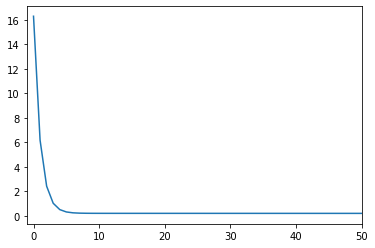

In [53]:
plt.plot(Loss)
plt.xlim((-1,50))
plt.show()

#### Use R2 score to evaluate LR equation output

In [55]:
r2_score(y2,yhat)

0.9978712713616195